In [291]:
## Data Analysis Phase
## Main aim is to understand more about the data

import math
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from sklearn.feature_selection import RFE
from datetime import datetime
import smtplib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)


In [293]:
#Train data
#dataset=pd.read_csv('train.csv')

#All data
inputFile = 'TrainMod.xlsx'
xy_original = pd.read_excel(inputFile)
xy_original.columns = xy_original.columns.str.replace(' ','')

dataset=xy_original
## print shape of dataset with rows and columns
print(dataset.shape)

(39644, 61)


In [294]:
dataset.columns=[i.strip() for i in dataset.columns]

In [295]:
## print the top5 records
dataset.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,log_shares
0,http://mashable.com/2013/01/07/amazon-instant-...,"731,0","12,0","219,0","0,663594466988","0,999999992308","0,815384609112","4,0","2,0","1,0","0,0","4,6803652968","5,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","496,0","496,0","496,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,500331204081","0,378278929586","0,0400046751006","0,0412626477296","0,0401225435029","0,521617145481","0,0925619834711","0,0456621004566","0,013698630137","0,769230769231","0,230769230769","0,378636363636","0,1","0,7","-0,35","-0,6","-0,2","0,5","-0,1875","0,0","0,1875","2,77305469336426"
1,http://mashable.com/2013/01/07/ap-samsung-spon...,"731,0","9,0","255,0","0,604743080614","0,999999993289","0,79194630341","3,0","1,0","1,0","0,0","4,9137254902","4,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,799755687423","0,0500466753998","0,0500962518137","0,0501006734234","0,0500007119405","0,341245791246","0,148947811448","0,043137254902","0,0156862745098","0,733333333333","0,266666666667","0,286914600551","0,0333333333333","0,7","-0,11875","-0,125","-0,1","0,0","0,0","0,5","0,0","2,85186960072977"
2,http://mashable.com/2013/01/07/apple-40-billio...,"731,0","9,0","211,0","0,575129530699","0,999999991597","0,66386554064","3,0","1,0","1,0","0,0","4,39336492891","6,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","918,0","918,0","918,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,217792288518","0,033334456999","0,0333514249339","0,0333335358046","0,682188293744","0,702222222222","0,323333333333","0,0568720379147","0,00947867298578","0,857142857143","0,142857142857","0,495833333333","0,1","1,0","-0,466666666667","-0,8","-0,133333333333","0,0","0,0","0,5","0,0","3,17609125905568"
3,http://mashable.com/2013/01/07/astronaut-notre...,"731,0","9,0","531,0","0,503787877834","0,999999996904","0,665634672862","9,0","0,0","1,0","0,0","4,40489642185","7,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0285732164707","0,419299641782","0,49465082574","0,0289047184252","0,0285715975818","0,42984968735","0,100704665705","0,0414312617702","0,0207156308851","0,666666666667","0,333333333333","0,385965171192","0,136363636364","0,8","-0,369696969697","-0,6","-0,166666666667","0,0","0,0","0,5","0,0","3,07918124604762"
4,http://mashable.com/2013/01/07/att-u-verse-apps/,"731,0","13,0","1072,0","0,41564561695","0,999999998565","0,540889525766","19,0","19,0","20,0","0,0","4,6828358209","7,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","545,0","16000,0","3151,15789474","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0286328101715","0,0287935517322","0,0285751849112","0

In [296]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),' % missing values')

In [297]:
dataset.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
log_shares                      0
Length: 61, dtype: int64

In [298]:
#sns.heatmap(dataset.isnull(), yticklabels==False)

In [299]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean shares where the information is missing or present
    data.groupby(feature)['shares'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [300]:
#There are no missing values

In [301]:
 print("Id of News {}".format(len(dataset.url)))

Id of News 39644


In [302]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  0


""
0
1
2
3
4


In [72]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'timedelta' in feature]

year_feature

['timedelta']

In [73]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

timedelta [198 660 552 559 573 149 702 111 709 188 542  79 594 443 540 539 121 517
 541 113 238 100  22 298 695 105 127 199 648 528 722 267 625 456 123 592
  31  16 323 223  46 205 143 131  78 700  92 189 144 723 605  91 219 691
 112 216 515 329  94 272 287 393 134 454 731 208 721 317 124 682  33 387
 414  34 675 119  99 402 526 226 201 266 345 603 292  98  84 318 380 653
 589 444 321 104 253 257 129 331 349  61 168 514 506 596 289 570 302 436
 183 668  57 128 532 265 343 434 556 177 692  69 644 280 133 220 108 384
 496 313  59 662 350 461 251  37 415 192 616  20 118 161 221 449 627 590
 688 142 154  77 196 204 495 282 612 586  83 381 187 163 545 240 729 224
 218 431 598 358 724 447 518 342 611 141 464 671 135 507 278 371 504 634
 239 178 352 679 290 152 476 288 308 401 336 210 581  30 655   9 687 427
 386  70 639  80 680 346 175 315 483 190  65 307 482 550 701 420 338 472
 609 715 674 525 503 685 279 666 242 206 717 377 300 707 193 245 337 330
 320  76  87 468 520 694 360 211  48 230 

Text(0.5, 1.0, 'timedelta vs shares')

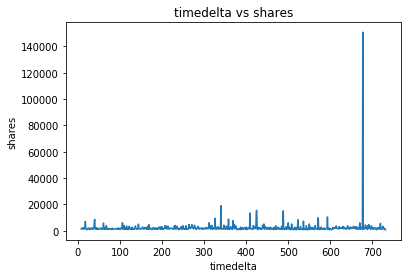

In [74]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('timedelta')['shares'].median().plot()
plt.xlabel('timedelta')
plt.ylabel('shares')
plt.title("timedelta vs shares")

In [75]:
#there is no actual relationship
#Most shares in [300,600] days 

In [76]:
year_feature

['timedelta']

In [77]:
## Here we will compare the difference between All time feature with shares

for feature in year_feature:
    if feature!='timedelta':
        data=dataset.copy()
        ## We will capture the difference between time variable and nº shares
        data[feature]=data['timedelta']-data[feature]

        plt.scatter(data[feature],data['shares'])
        plt.xlabel(feature)
        plt.ylabel('shares')
        plt.show()

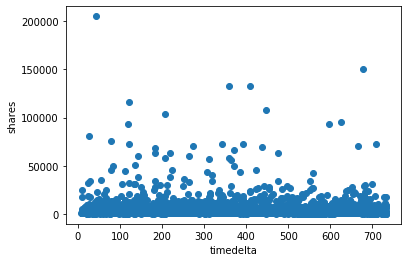

In [84]:
plt.scatter(data['timedelta'],data['shares'])
plt.xlabel('timedelta')
plt.ylabel('shares')
plt.show()



In [79]:
## Decision: Drop timedelta

In [80]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

#threshold: 25 
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [81]:
discrete_feature

['n_tokens_title',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_max',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend']

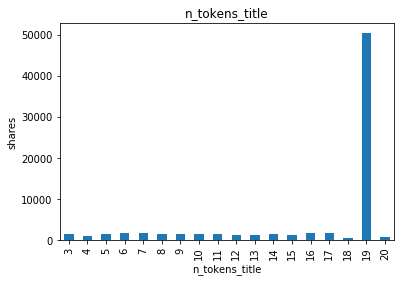

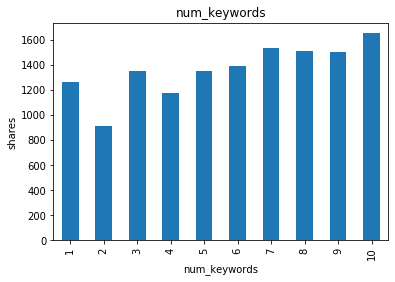

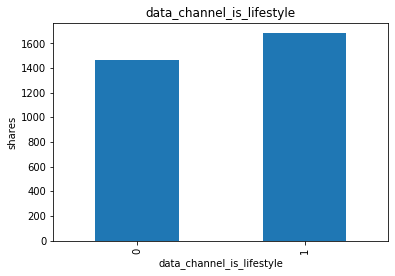

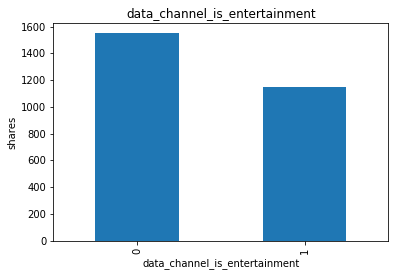

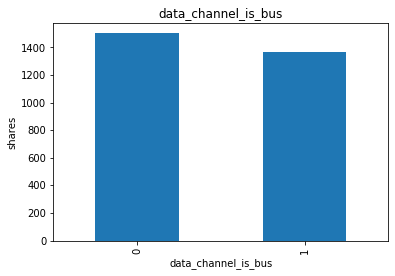

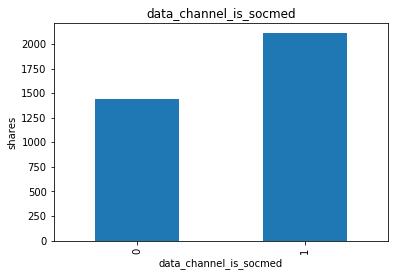

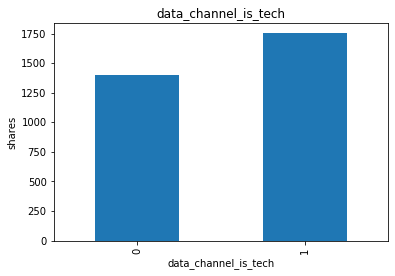

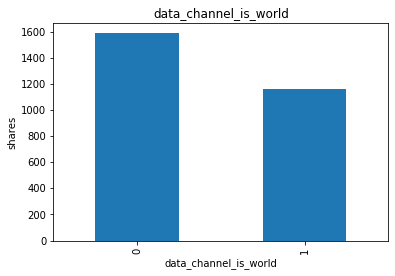

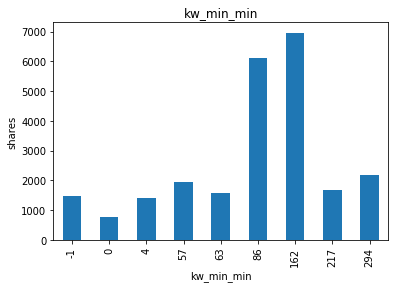

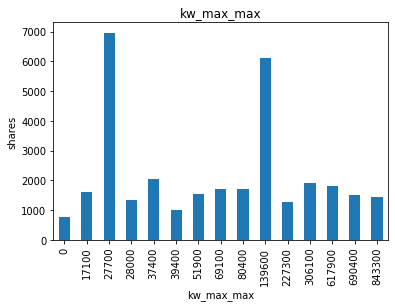

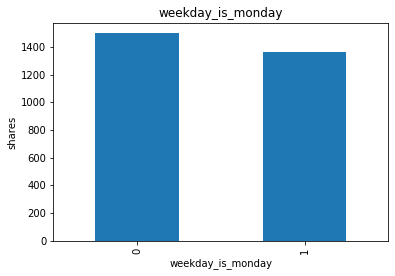

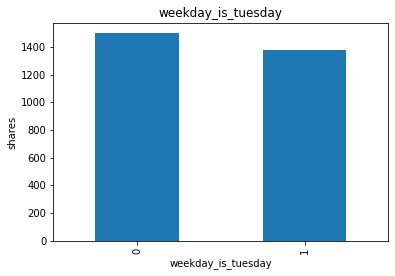

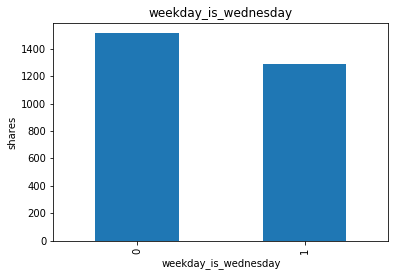

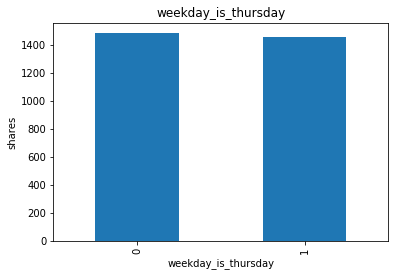

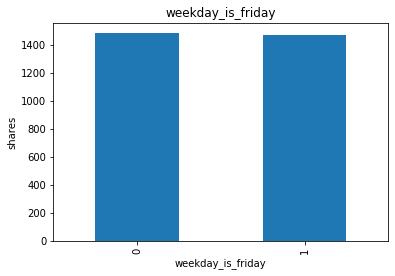

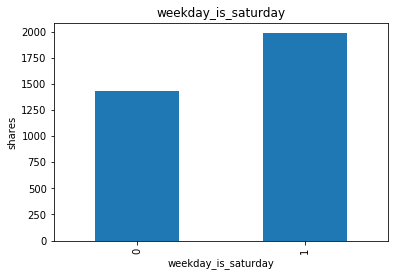

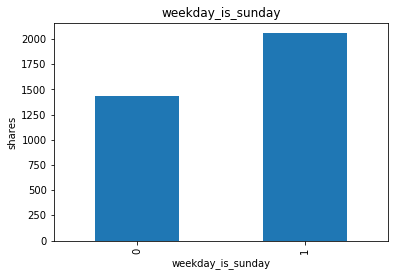

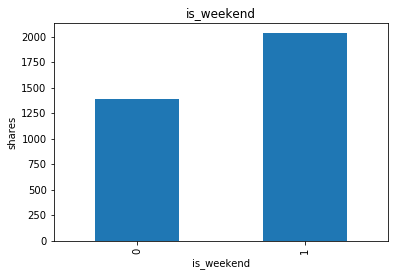

In [82]:
## Lets Find the realtionship between them and shares

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['shares'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('shares')
    plt.title(feature)
    plt.show()

In [85]:
#dummy variables
    #data_channel
        #SocMedia & Tech dominates the shares
        #Then lifestyle
        #News of business, entertainment and world have less shares
    #weekday
        #Evolution of shares: Monday -> Weekend
        
#There is some kind of relationship in num_keywords (more => shares)



In [87]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 41


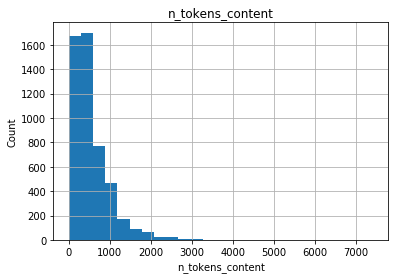

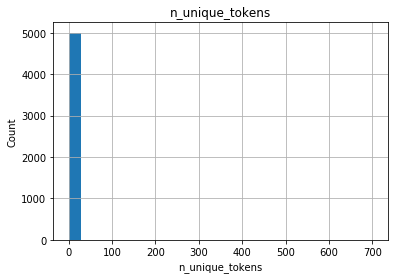

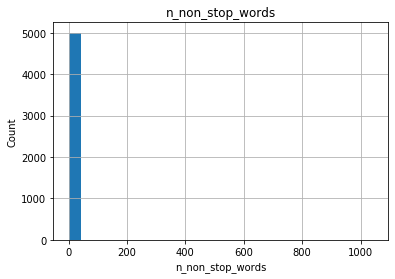

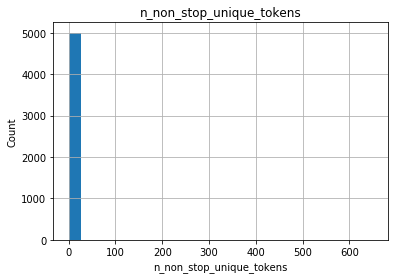

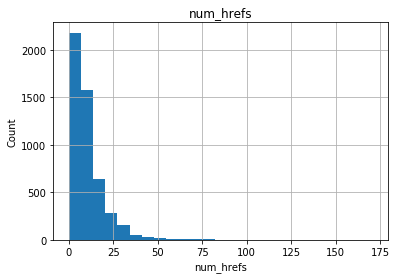

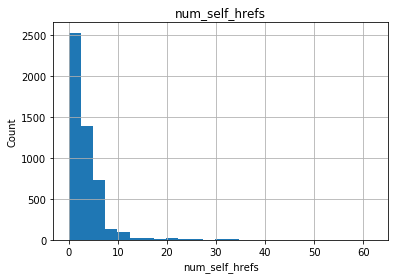

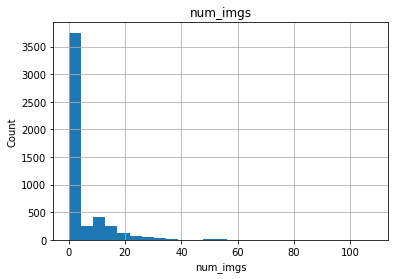

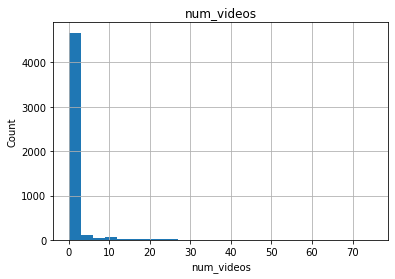

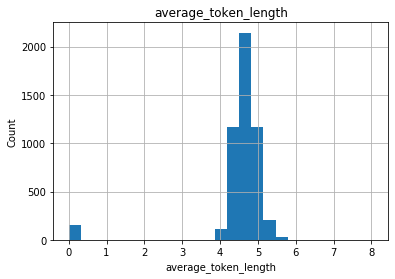

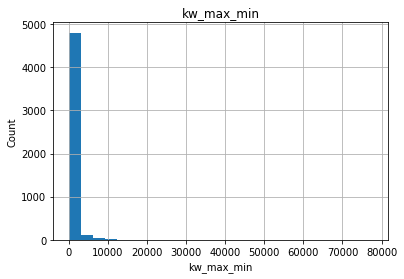

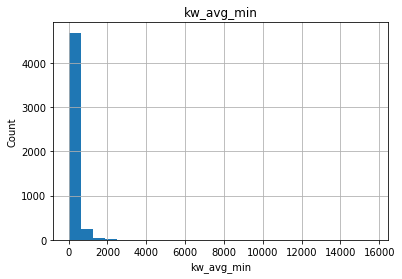

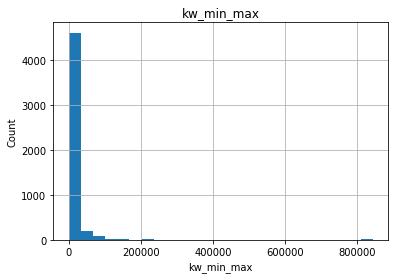

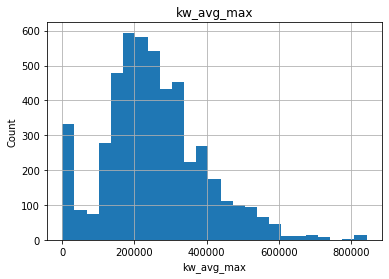

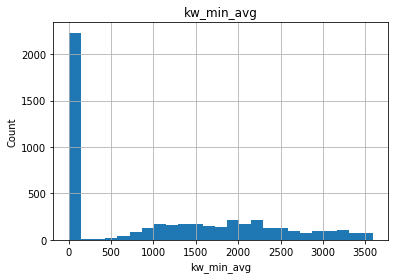

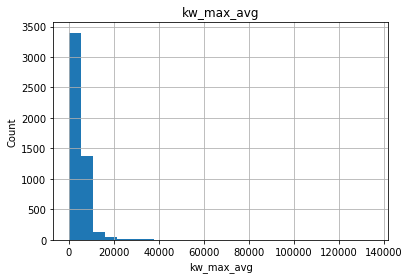

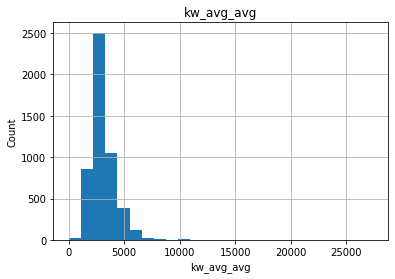

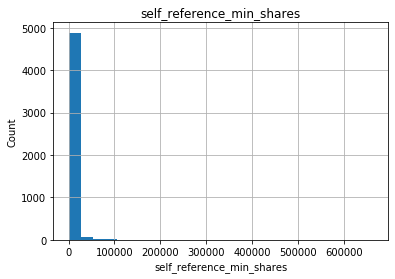

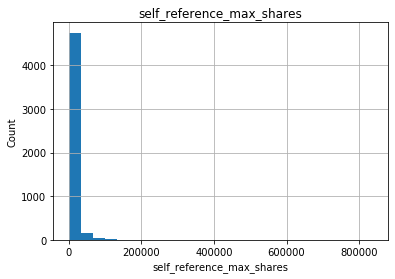

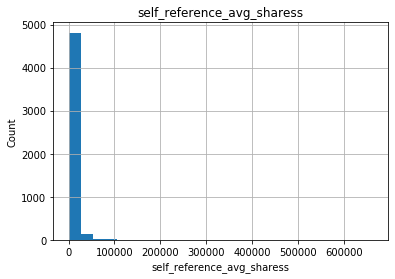

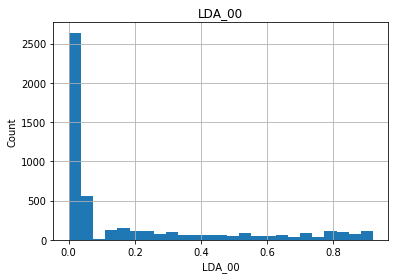

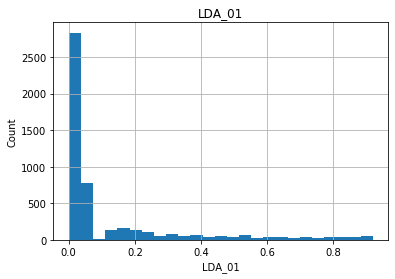

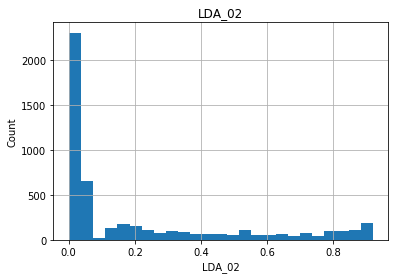

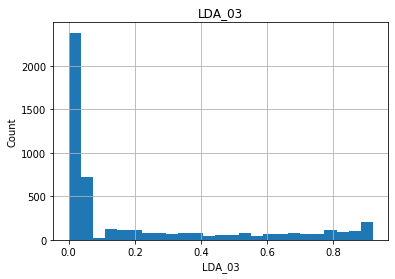

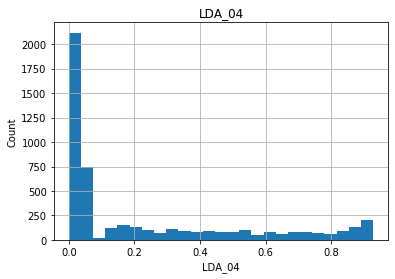

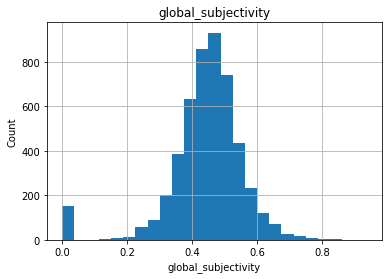

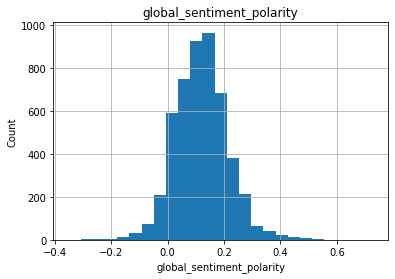

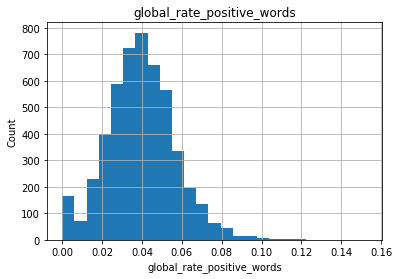

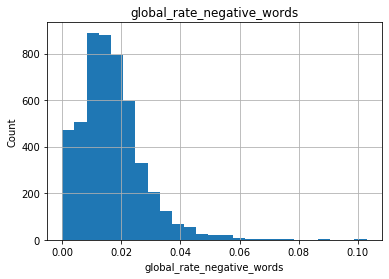

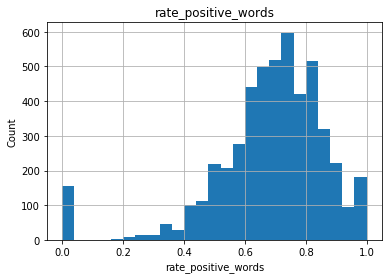

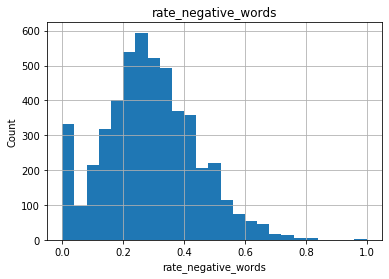

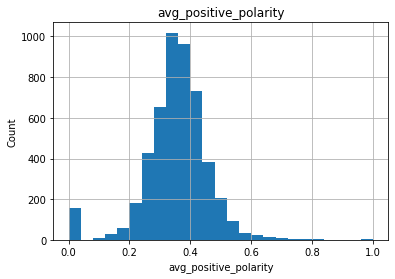

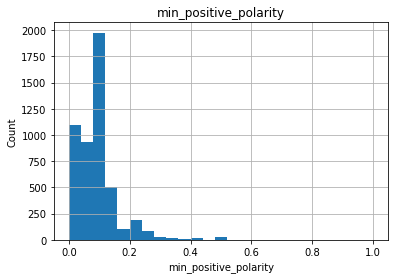

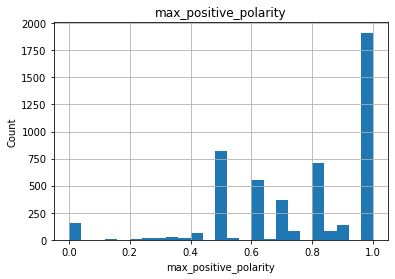

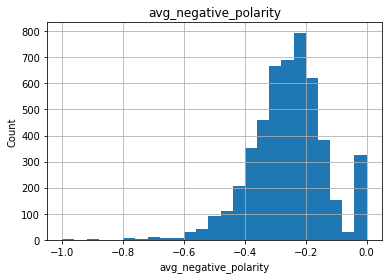

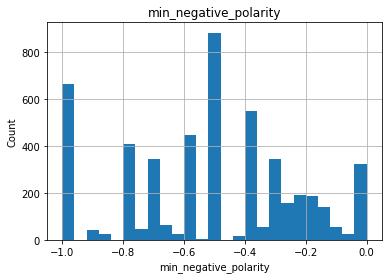

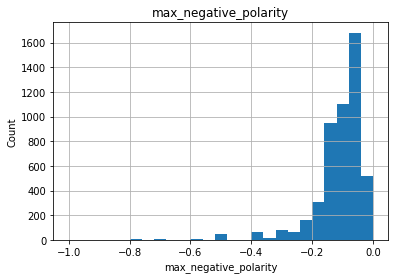

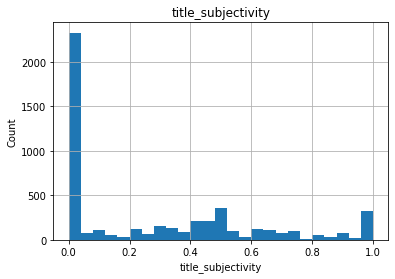

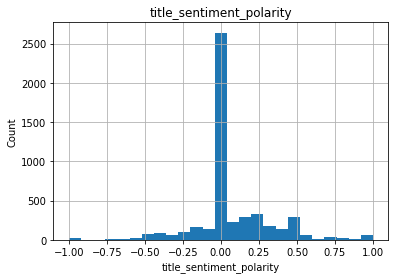

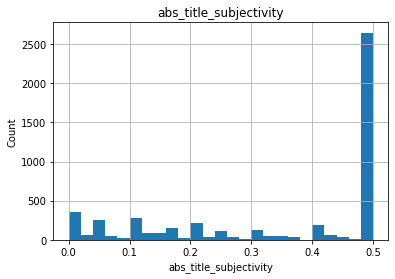

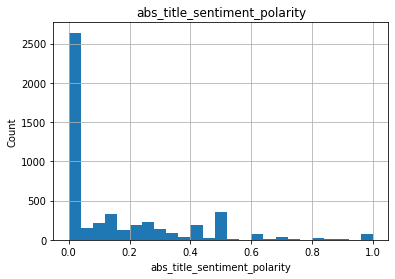

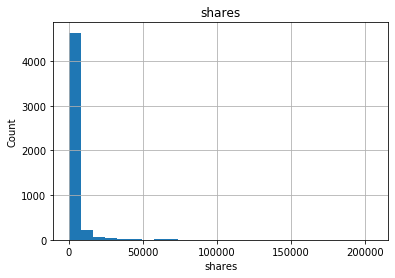

In [88]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

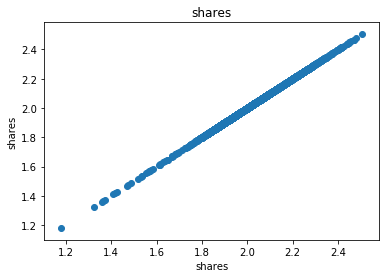

In [89]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['shares']=np.log(data['shares'])
        plt.scatter(data[feature],data['shares'])
        plt.xlabel(feature)
        plt.ylabel('shares')
        plt.title(feature)
        plt.show()

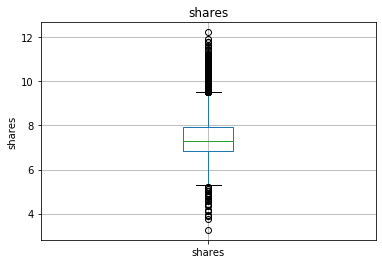

In [90]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [91]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['url']

In [92]:
dataset[categorical_features].head()

,url
0,http://mashable.com/2014/06/24/relayrides-fund...
1,http://mashable.com/2013/03/19/google-capture-...
2,http://mashable.com/2013/07/05/summer-dreadful...
3,http://mashable.com/2013/06/28/ar-glasses-for-...
4,http://mashable.com/2013/06/14/foursquare-busi...


In [96]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is url and number of categories are 5000


In [98]:
## There is no relationship between categorical variable and dependent feature shares
## Decision: drop url. Its like an id 

In [309]:
dataset.drop([30264], axis=0, inplace = True)

In [312]:
dataset.drop(['url','timedelta','is_weekend','weekday_is_monday','data_channel_is_world'], axis=1, inplace=True)
#lreg=dataset.copy()

#for i in lreg.columns:
    #if i not in discrete_feature and i not in 'shares':
        #lreg.drop([i],axis=1,inplace=True)

In [313]:
dataset.shape

(39643, 56)

In [314]:
xy_original.shape

(39643, 56)

In [152]:
#for i in len(lreg.rows):
    #if lreg.iloc(i,len(lreg.columns)-1) > 3400:
        #lreg(i,len(lreg.columns)-1) = 1
    #else:
        #lreg(i,len(lreg.columns)-1) = 0

In [153]:
#lreg.head()

In [154]:
#x=lreg.drop("shares", axis=1)
#y=lreg["shares"]

In [155]:
#from sklearn.model_selection import train_test_split

In [156]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [157]:
#from sklearn.linear_model import LogisticRegression

In [158]:
#logmodel=LogisticRegression()

In [159]:
#logmodel.fit(x_train,y_train)

In [160]:
#predictions = logmodel.predict(x_test)

In [161]:
#from sklearn.metrics import classification_report

In [162]:
#classification_report(y_test,predictions)

In [163]:
#from sklearn.metrics import confusion_matrix

In [164]:
#confusion_matrix(y_test,predictions)

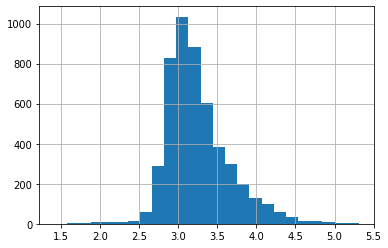

In [202]:
#dataset['shares']=(data['shares'])
#dataset['shares']=dataset['shares'].apply(log10)
#dataset['shares'].hist(bins=25)

In [317]:
#dataset['n_tokens_content']=(data['n_tokens_content'])
#dataset['n_tokens_content']=np.log(1.001+dataset['n_tokens_content'])
#dataset['n_tokens_content'].hist(bins=25)

In [318]:
dataset['n_tokens_content']

0        0.525381
1        0.585904
2        0.638835
3        0.643617
4        0.572272
           ...   
39639         NaN
39640         NaN
39641         NaN
39642         NaN
39643         NaN
Name: n_tokens_content, Length: 39643, dtype: float64

In [211]:
colsnplog=["n_tokens_content","n_unique_tokens","n_non_stop_words"," n_non_stop_unique_tokens",
          "num_hrefs"," num_self_hrefs","num_imgs","num_videos","kw_max_min",
          "kw_min_max","kw_max_avg","self_reference_min_shares","self_reference_max_shares",
          "self_reference_avg_sharess","LDA_00","LDA_01","LDA_02","LDA_03","LDA_04",
          "max_positive_polarity","title_subjectivity","abs_title_sentiment_polarity"]

In [213]:
for i in dataset.columns:
    if i in colsnplog:
        dataset[i]=np.log(1.001+dataset[i])

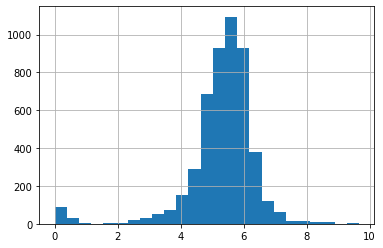

In [220]:
dataset['kw_avg_min']=(data['kw_avg_min'])
dataset['kw_avg_min']=np.log(2+dataset['kw_avg_min'])
dataset['kw_avg_min'].hist(bins=25)

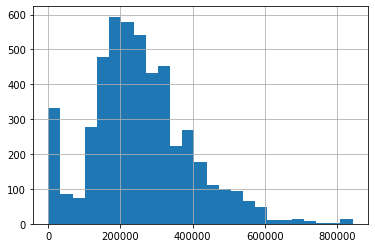

In [222]:
dataset['kw_avg_max']=(data['kw_avg_max'])
#dataset['kw_avg_max']=np.log(1.001+dataset['kw_avg_max'])
dataset['kw_avg_max'].hist(bins=25)

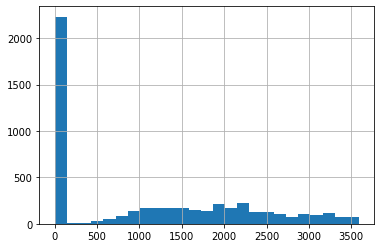

In [227]:
dataset['kw_min_avg']=(data['kw_min_avg'])
#dataset['kw_min_avg']=1/(1.001+dataset['kw_min_avg'])
dataset['kw_min_avg'].hist(bins=25)

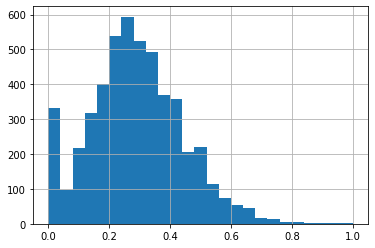

In [228]:
dataset['rate_negative_words']=(data['rate_negative_words'])
#dataset['kw_avg_min']=np.log(2+dataset['kw_avg_min'])
dataset['rate_negative_words'].hist(bins=25)

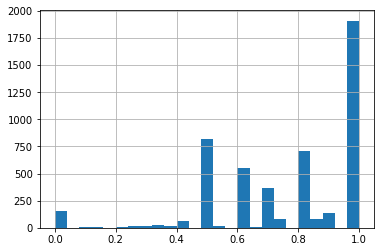

In [232]:
dataset['max_positive_polarity']=(data['max_positive_polarity'])
#dataset['max_positive_polarity']=1+(dataset['max_positive_polarity']*dataset['max_positive_polarity'])
dataset['max_positive_polarity'].hist(bins=25)

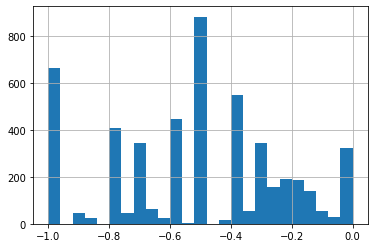

In [233]:
dataset['min_negative_polarity']=(data['min_negative_polarity'])
#dataset['max_positive_polarity']=1+(dataset['max_positive_polarity']*dataset['max_positive_polarity'])
dataset['min_negative_polarity'].hist(bins=25)

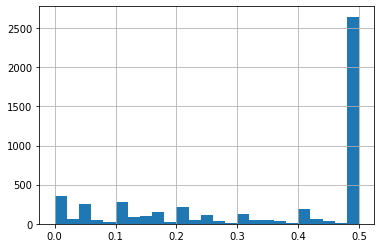

In [236]:
dataset['abs_title_subjectivity']=(data['abs_title_subjectivity'])
#dataset['abs_title_subjectivity']=np.exp(dataset['abs_title_subjectivity'])
dataset['abs_title_subjectivity'].hist(bins=25)

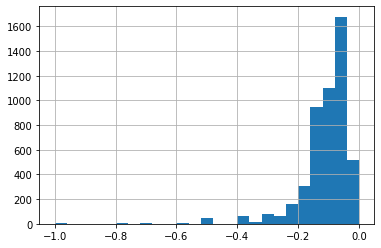

In [244]:
dataset['max_negative_polarity']=(data['max_negative_polarity'])
#dataset['max_negative_polarity']=np.exp(dataset['max_negative_polarity'])
dataset['max_negative_polarity'].hist(bins=25)

In [255]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
pyplot.rcParams["figure.figsize"] = fig_size

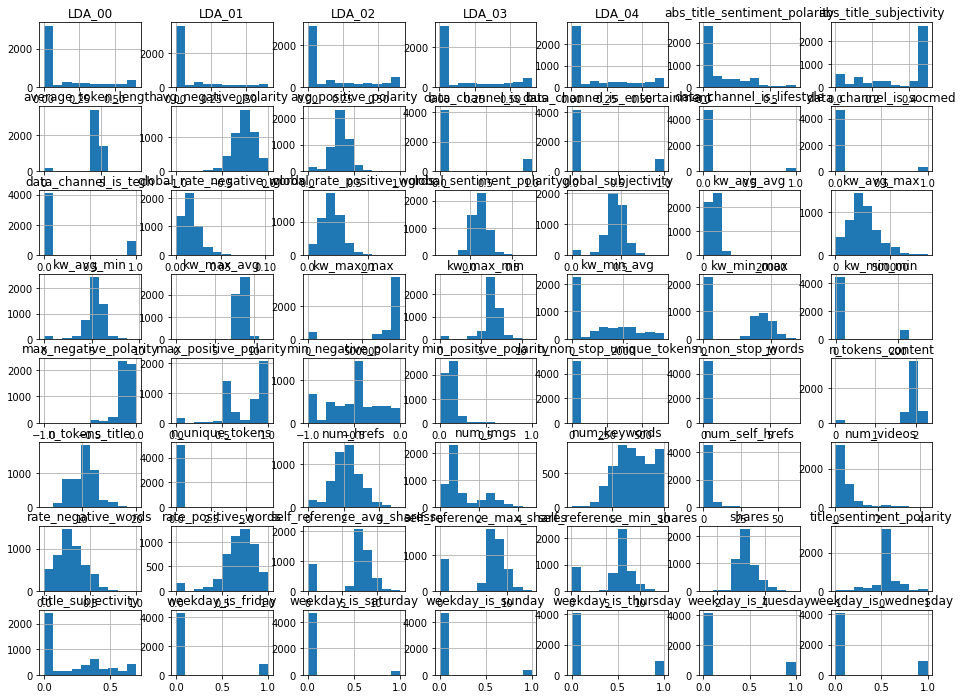

In [248]:
from matplotlib import pyplot
# Histograms for each attribute
dataset.hist()
pyplot.show()

In [249]:
dataset['LDA_00']=(data['LDA_00'])
dataset['LDA_01']=(data['LDA_01'])
dataset['LDA_02']=(data['LDA_02'])
dataset['LDA_03']=(data['LDA_03'])
dataset['LDA_04']=(data['LDA_04'])
dataset['title_subjectivity']=(data['title_subjectivity'])
dataset['abs_title_sentiment_polarity']=(data['abs_title_sentiment_polarity'])




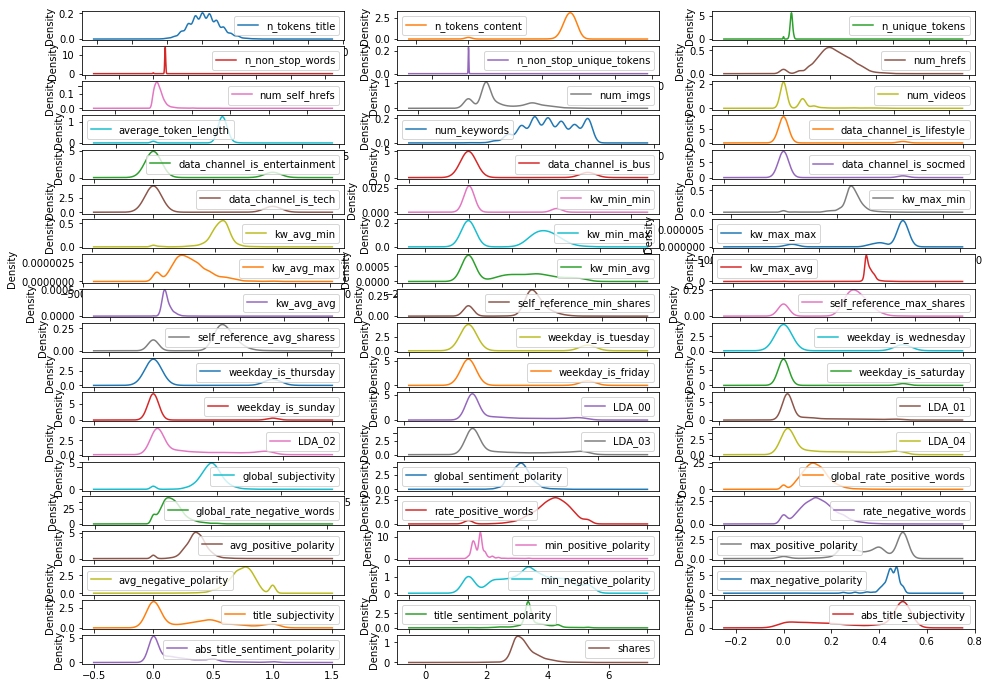

In [251]:
# Density plot for each attribute
dataset.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

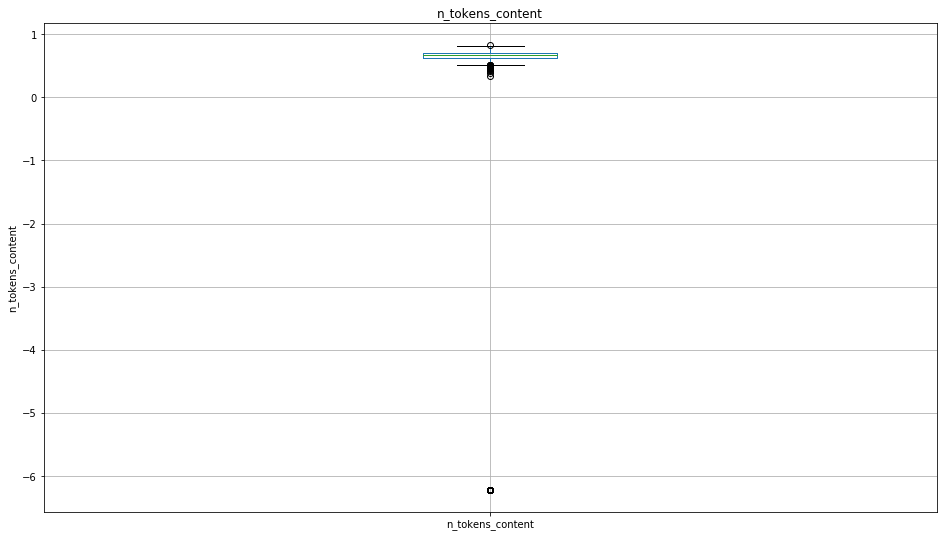

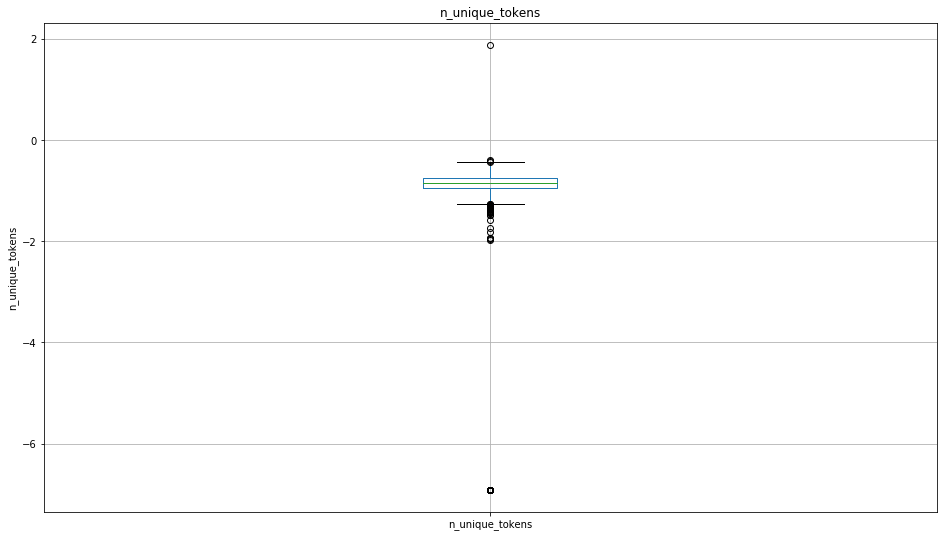

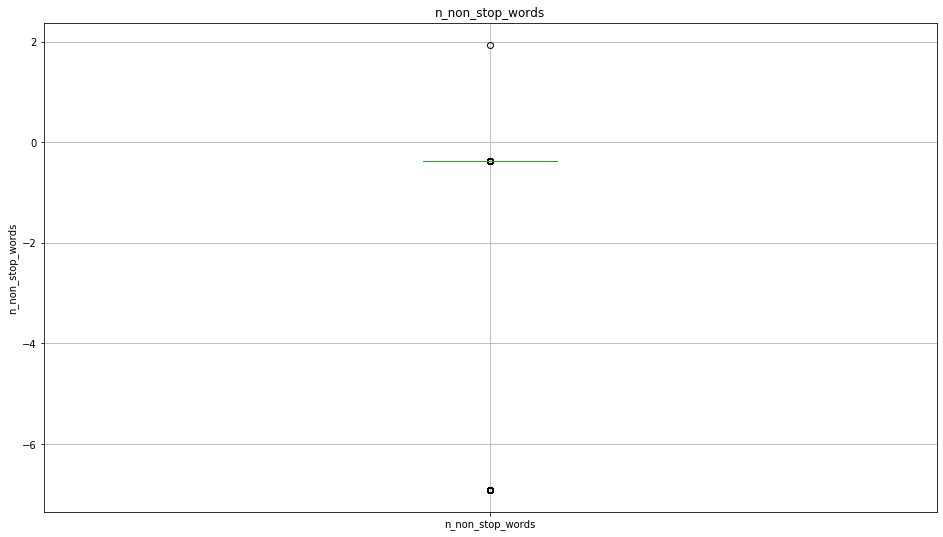

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


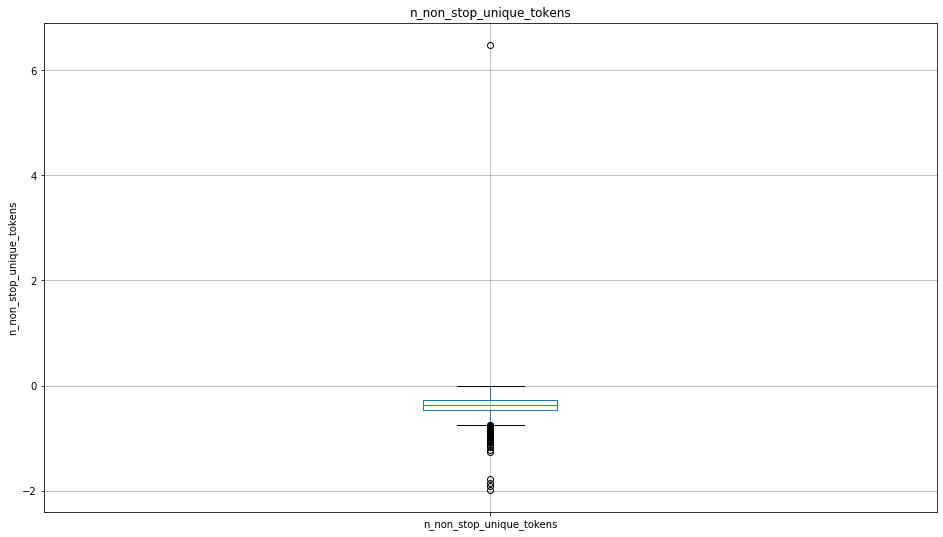

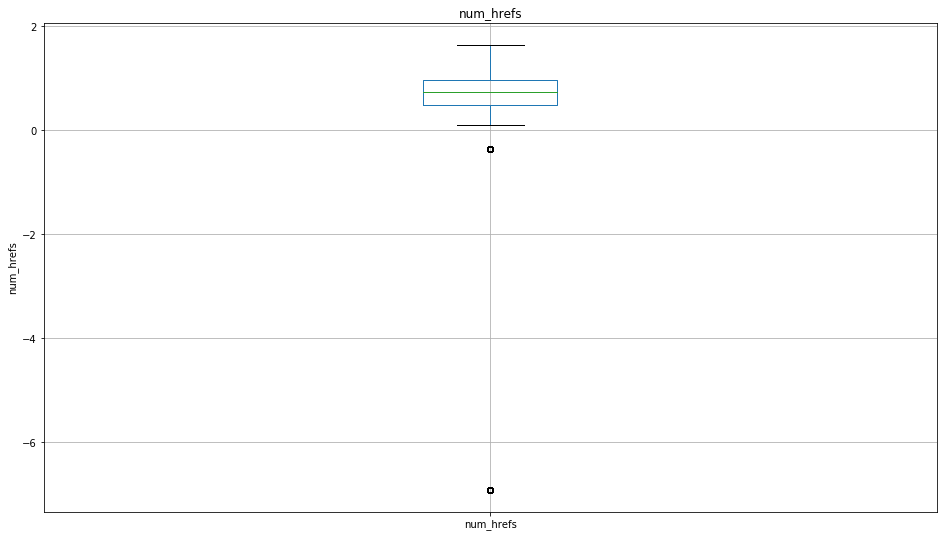

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


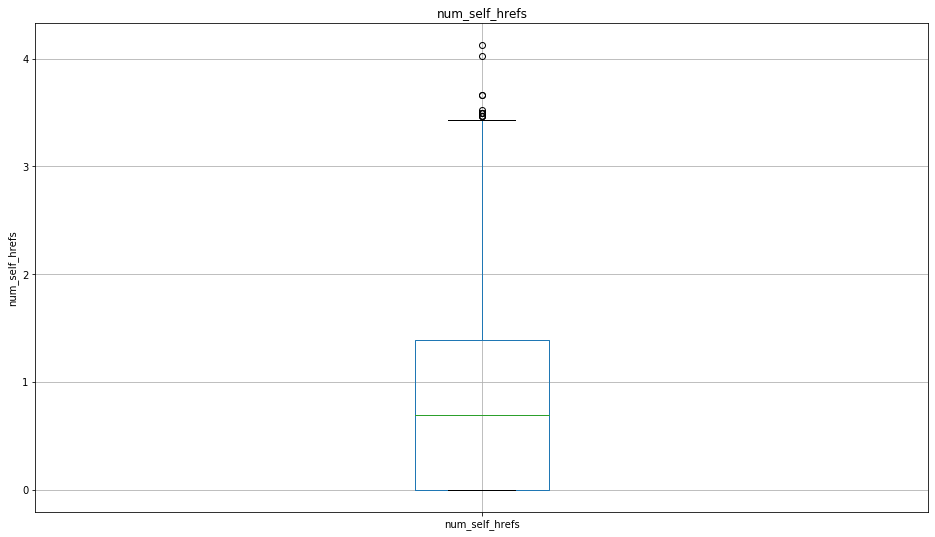

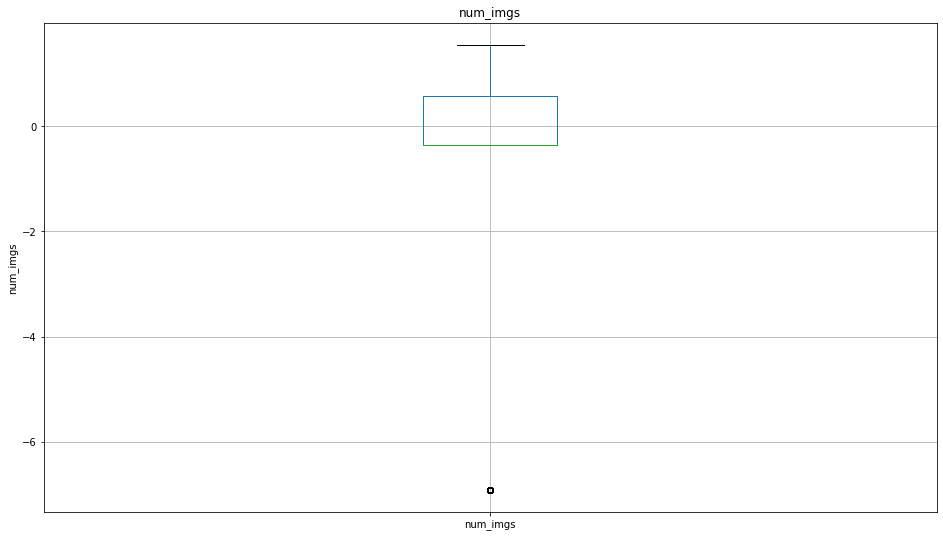

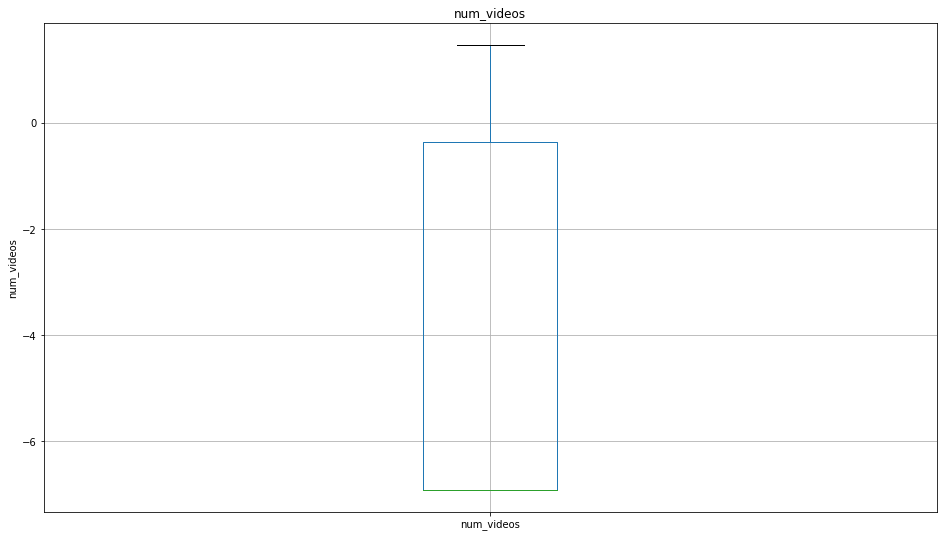

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


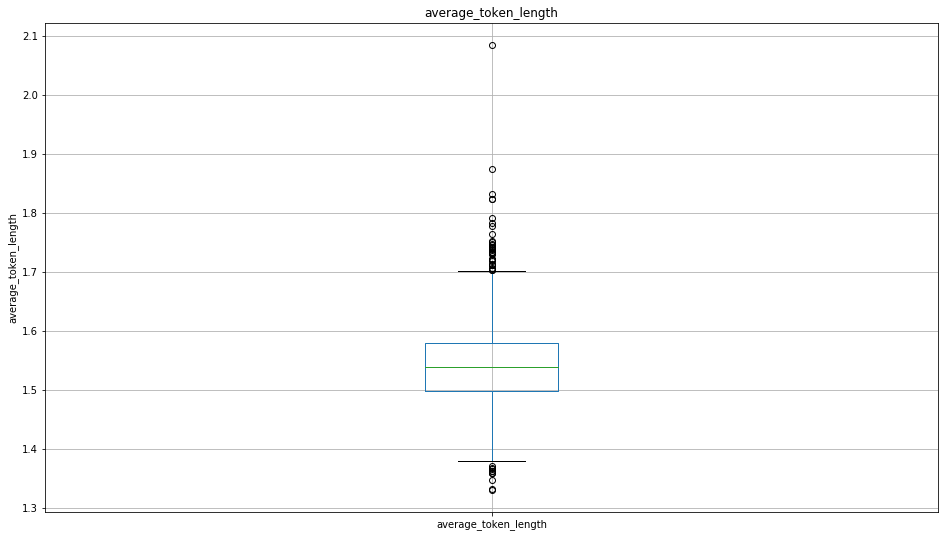

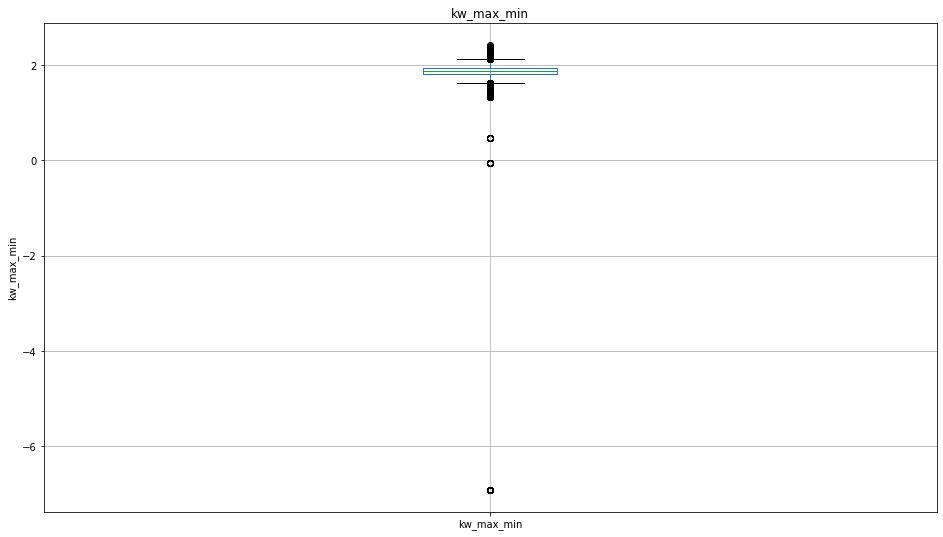

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


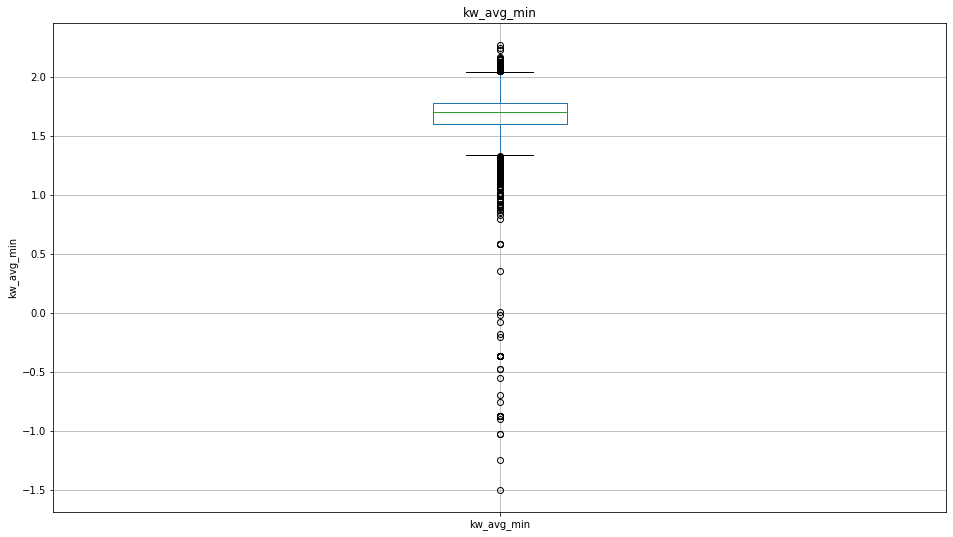

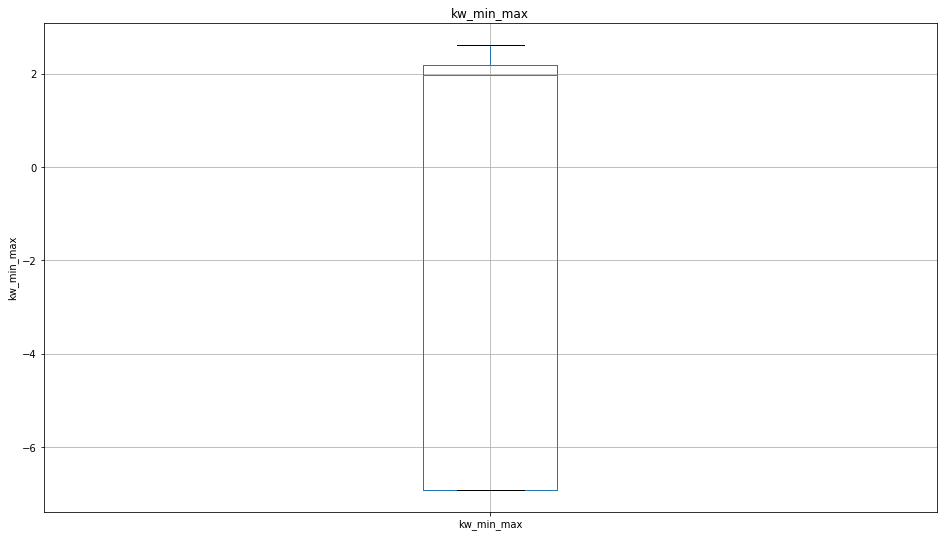

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


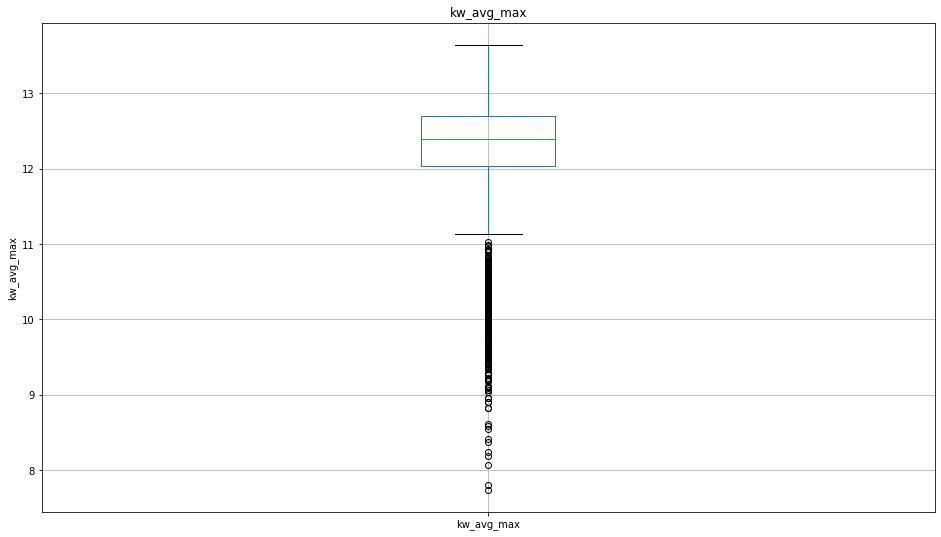

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


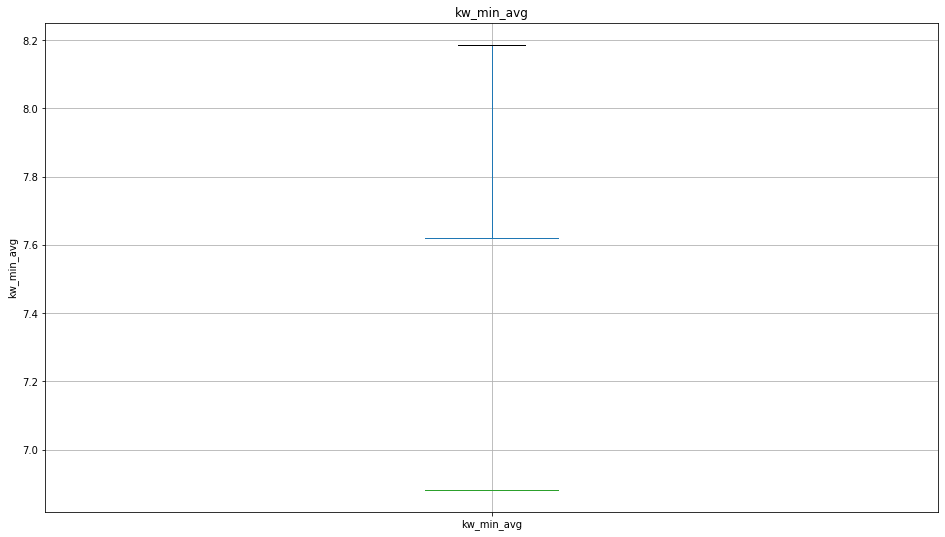

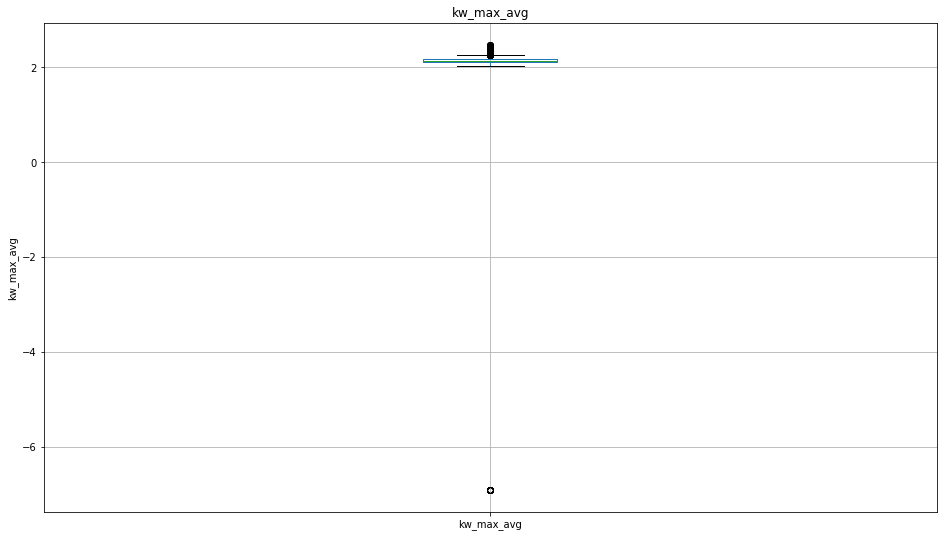

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


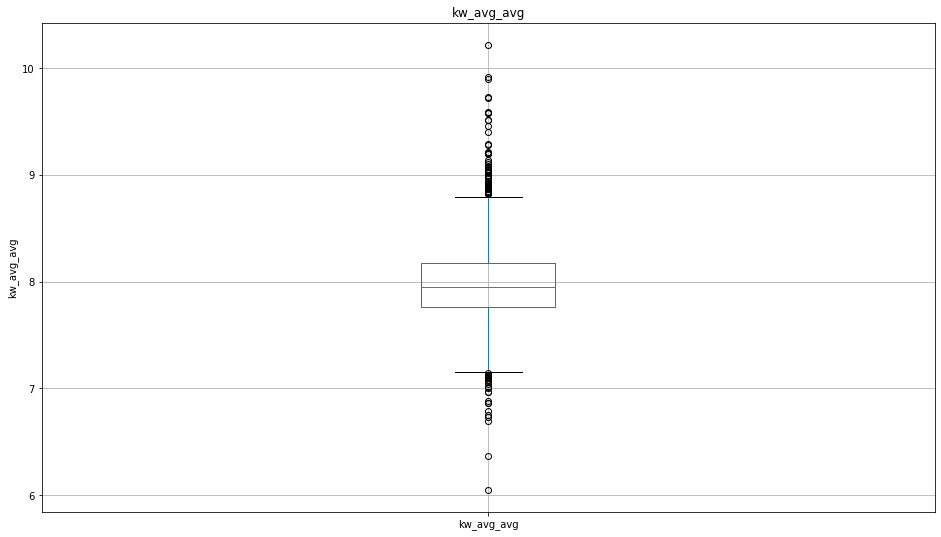

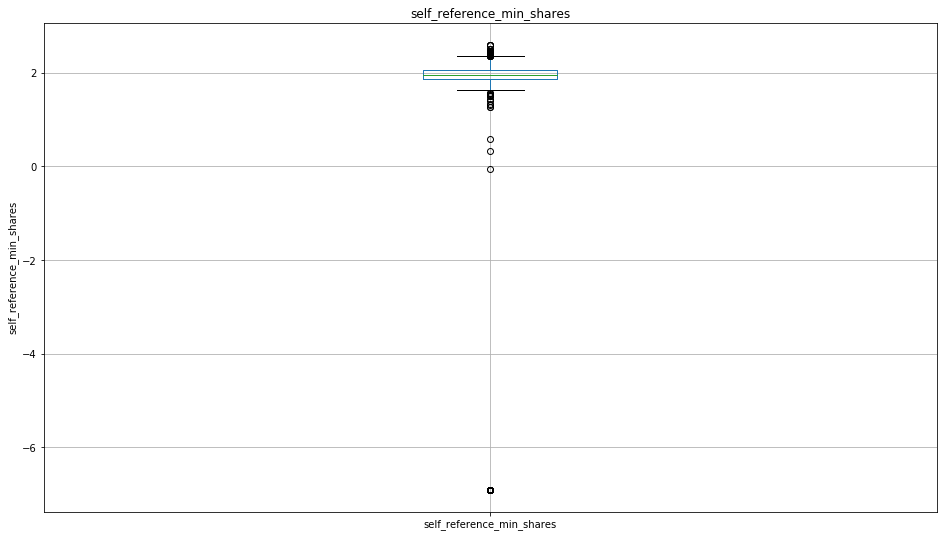

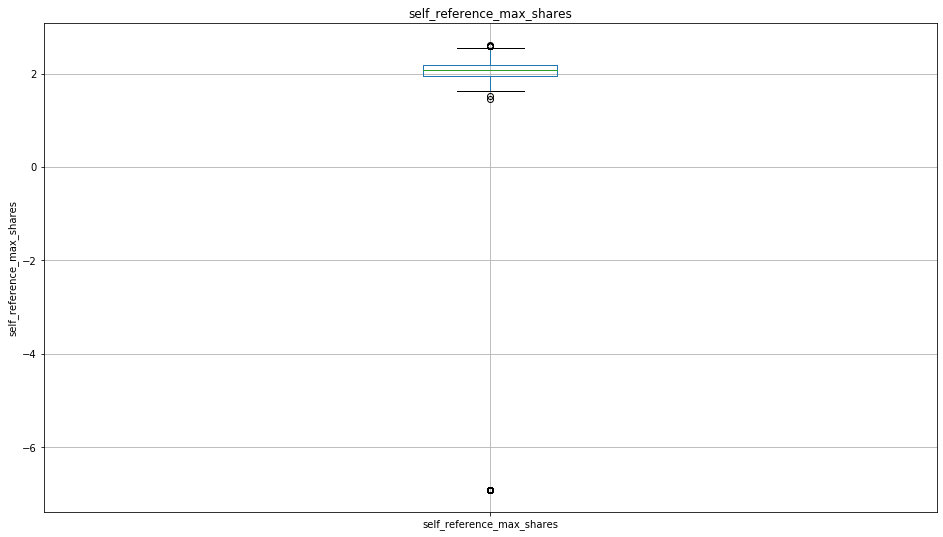

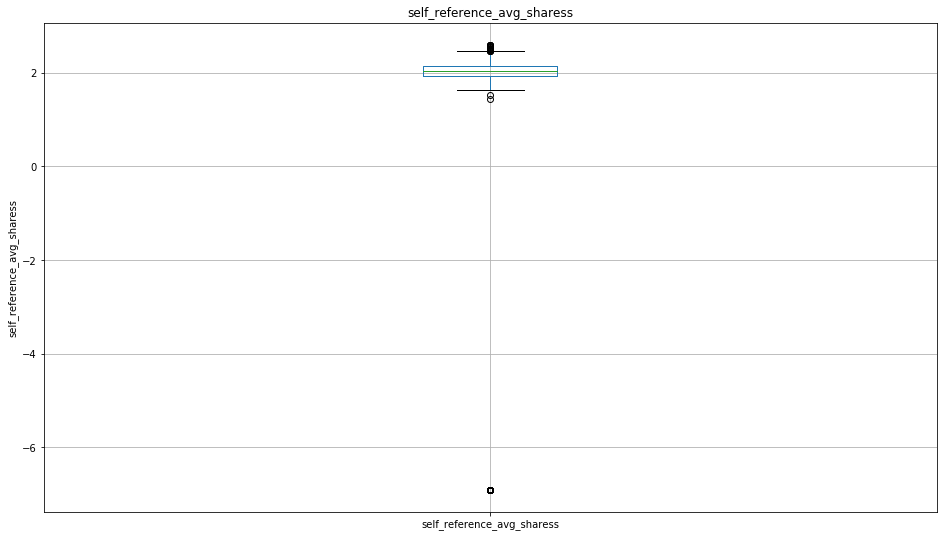

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


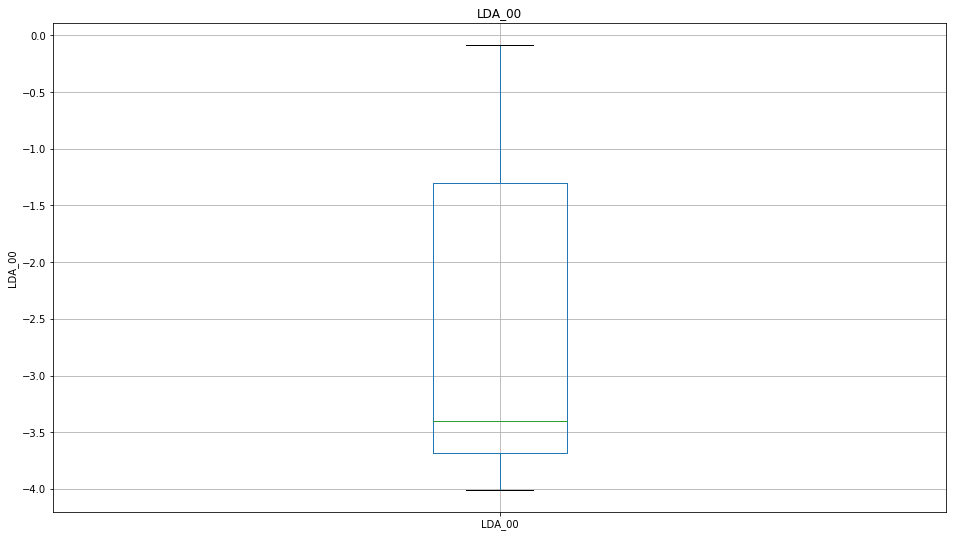

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


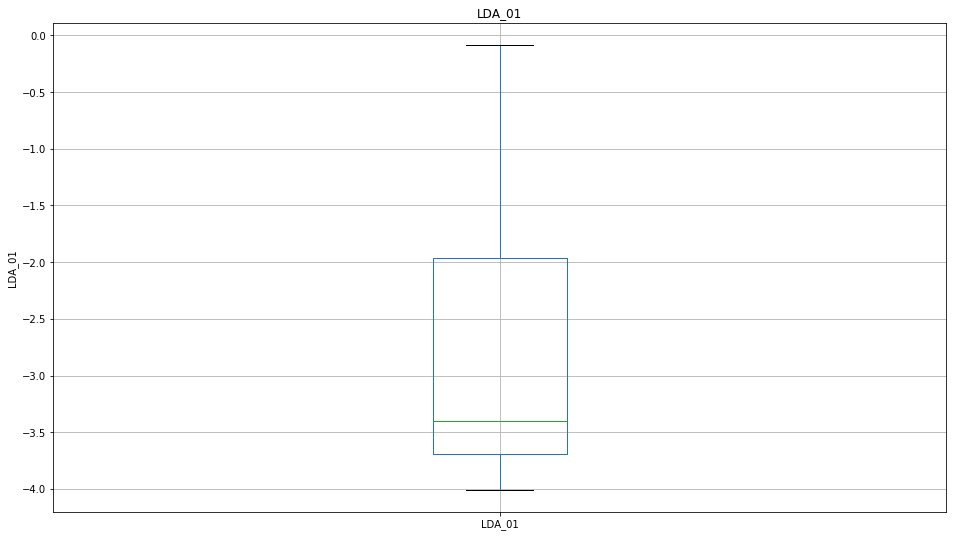

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


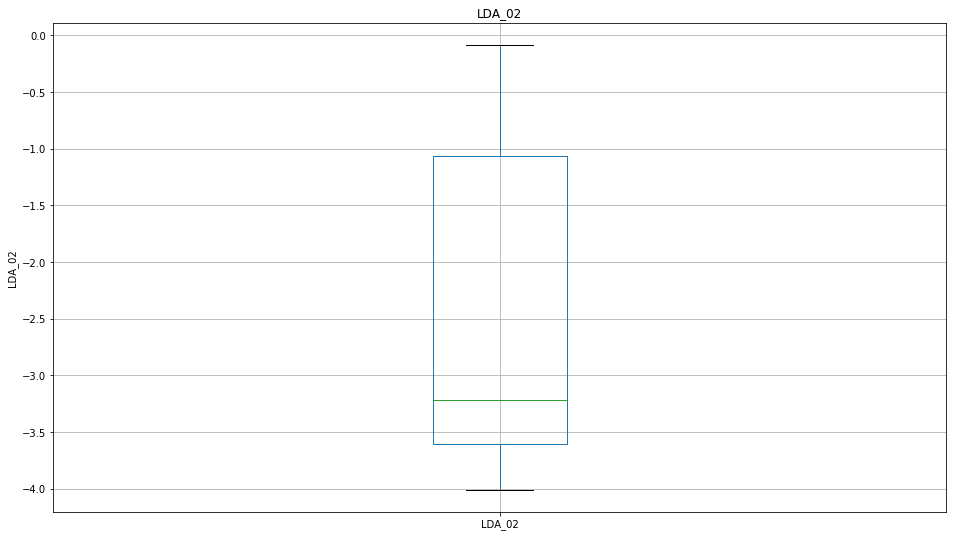

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


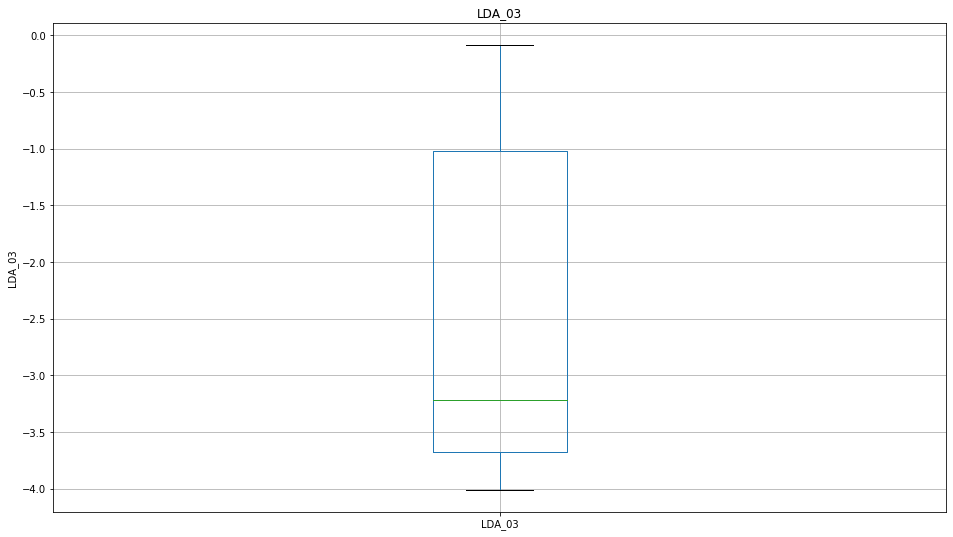

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


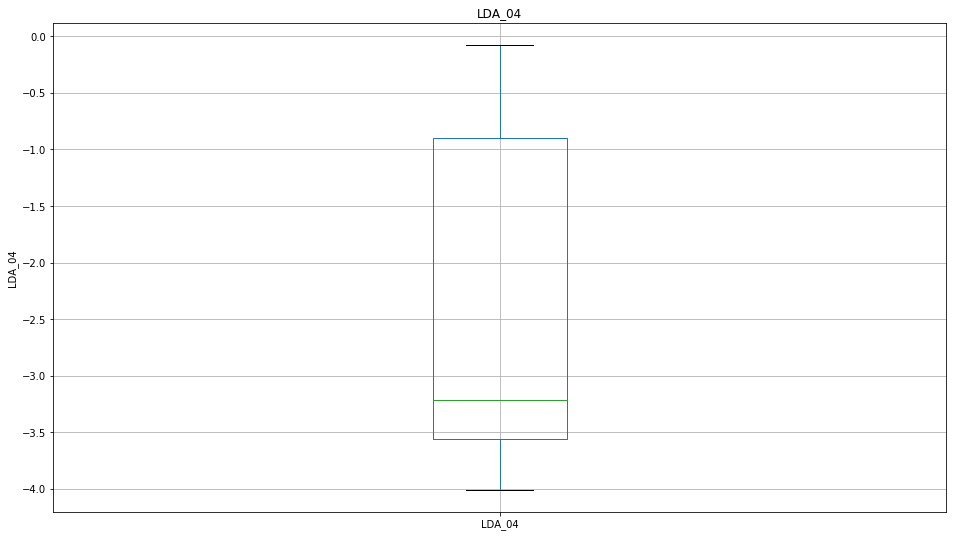

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


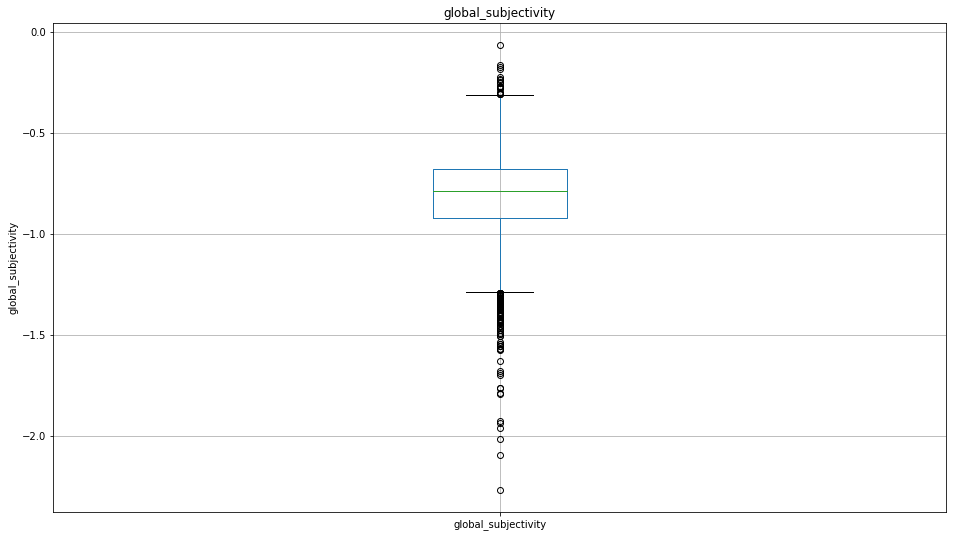

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


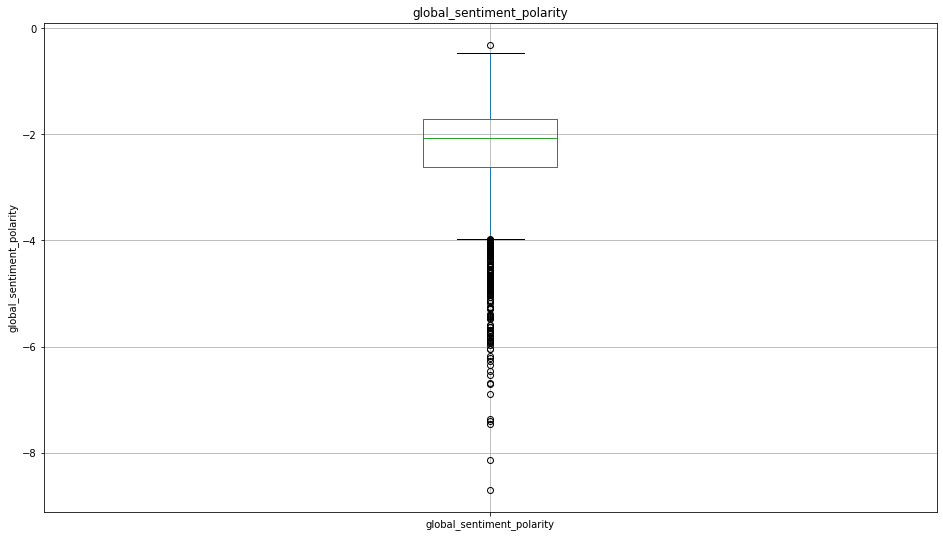

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


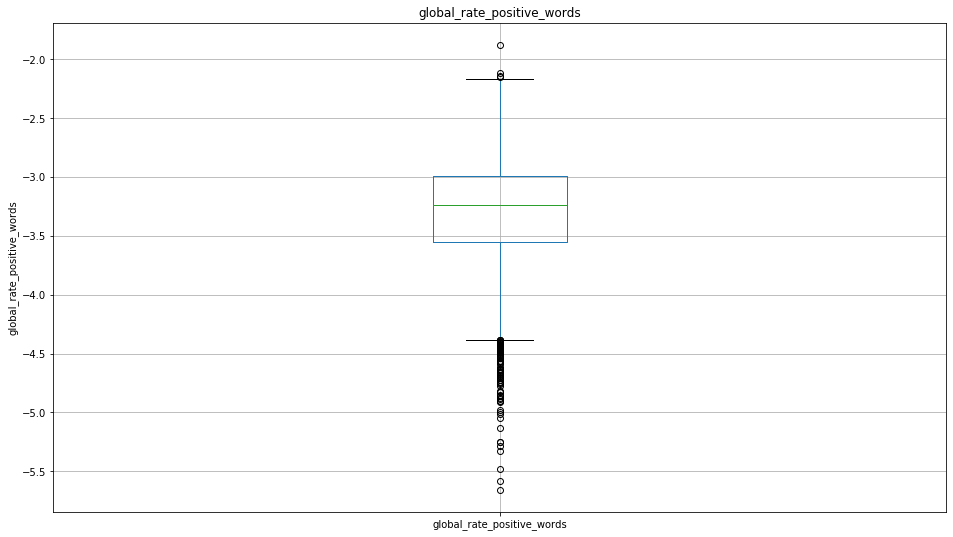

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


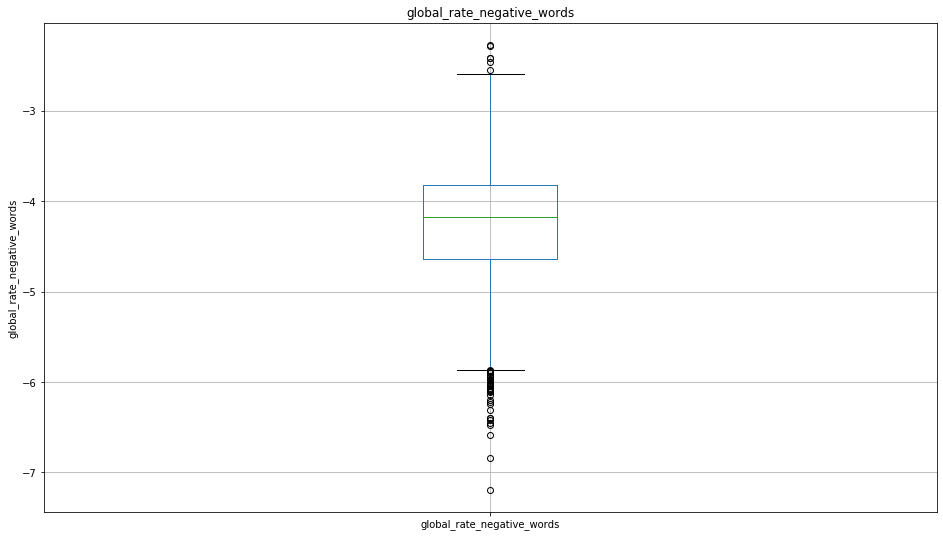

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


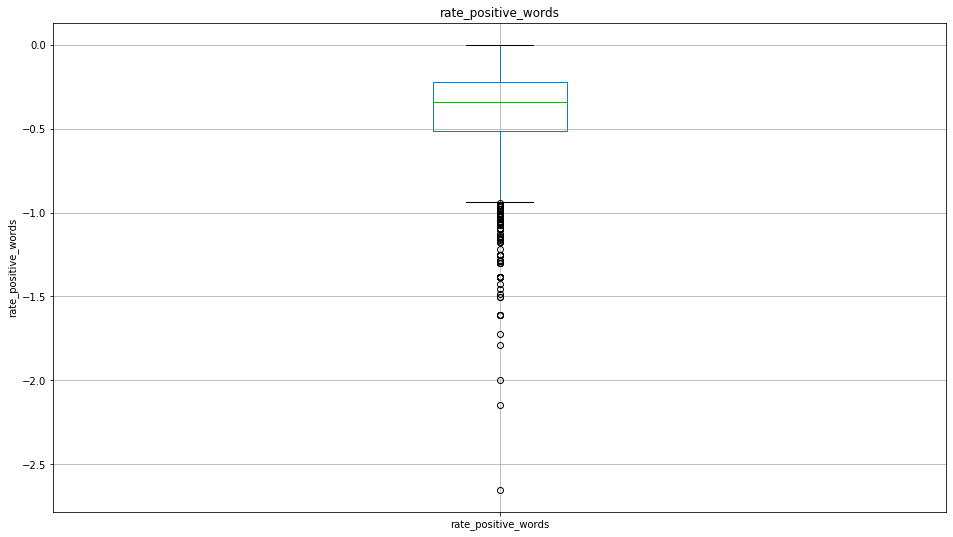

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


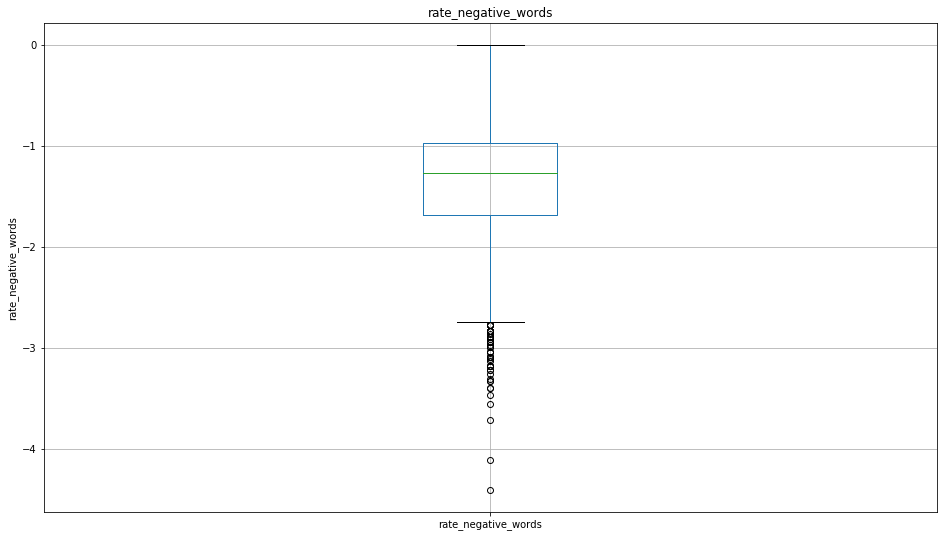

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


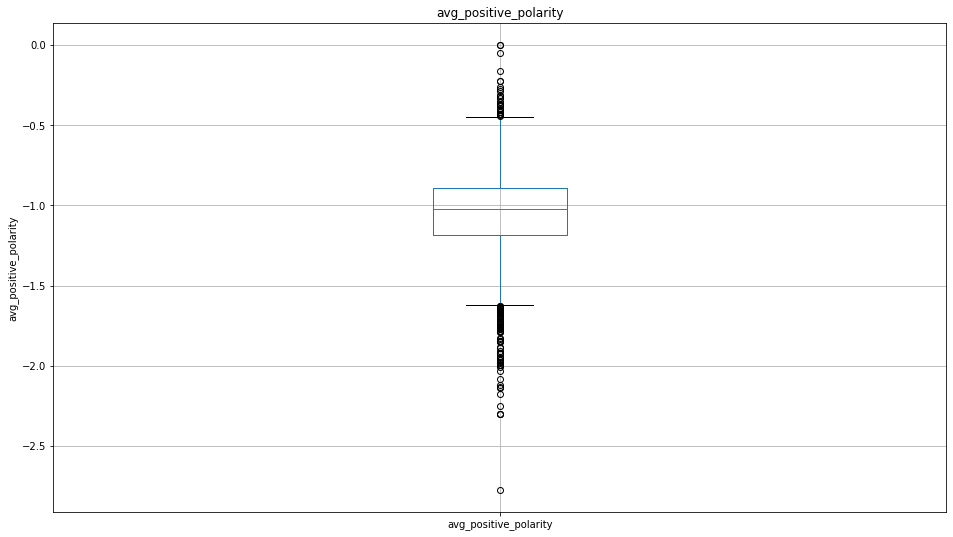

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


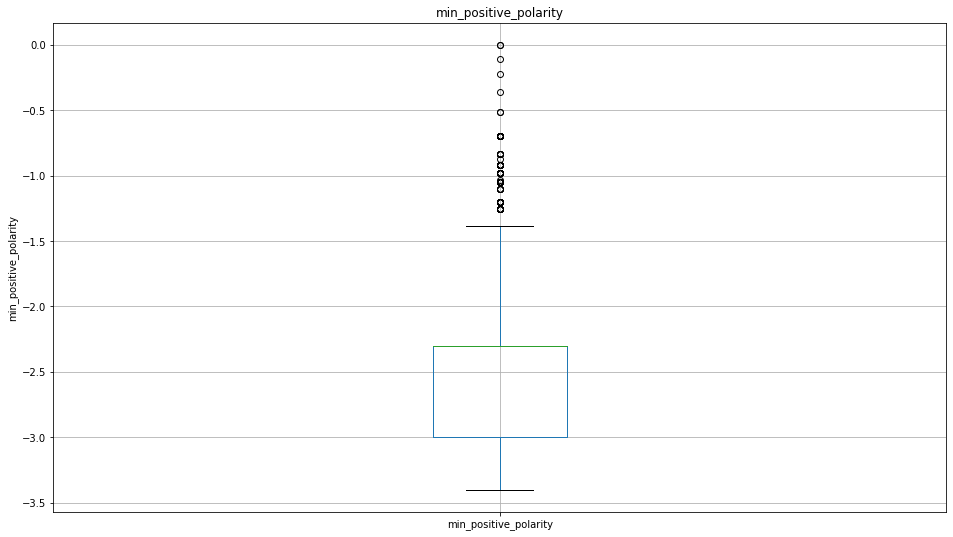

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


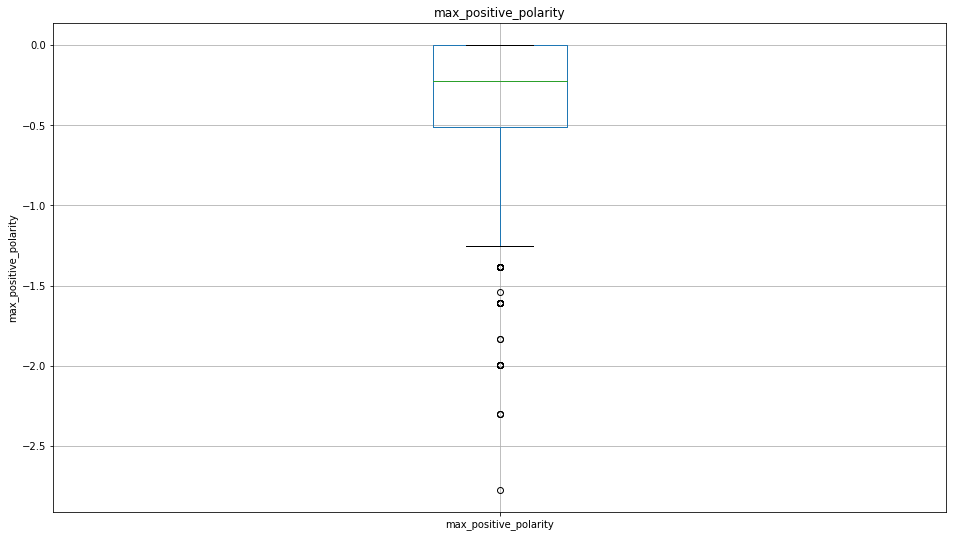

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dfgbe\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\dfgbe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\dfgbe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\dfgbe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whi

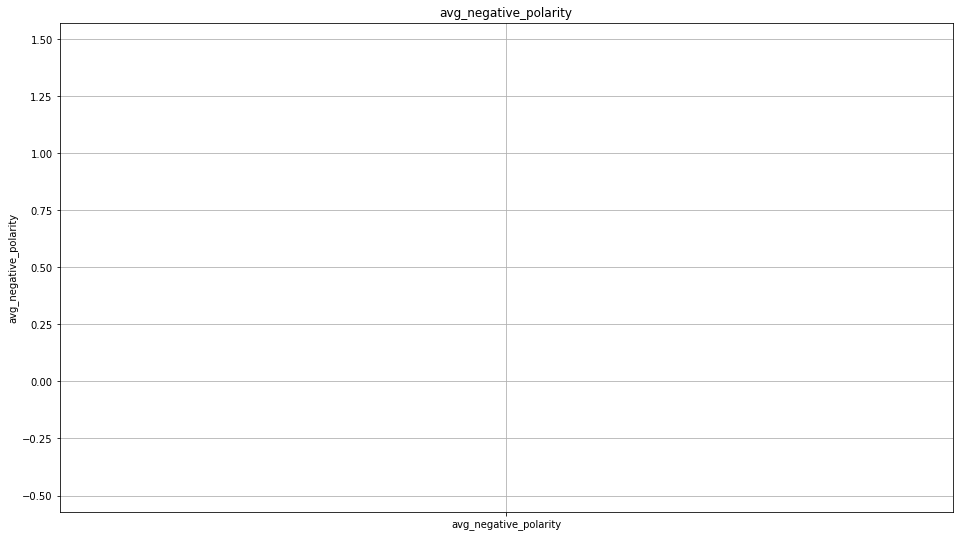

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dfgbe\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\dfgbe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\dfgbe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\dfgbe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whi

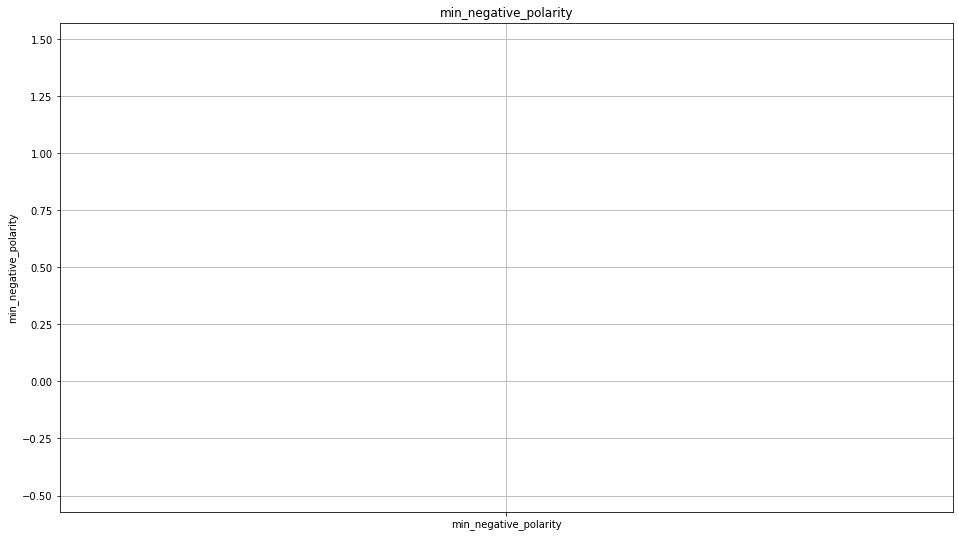

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dfgbe\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\dfgbe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\dfgbe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\dfgbe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whi

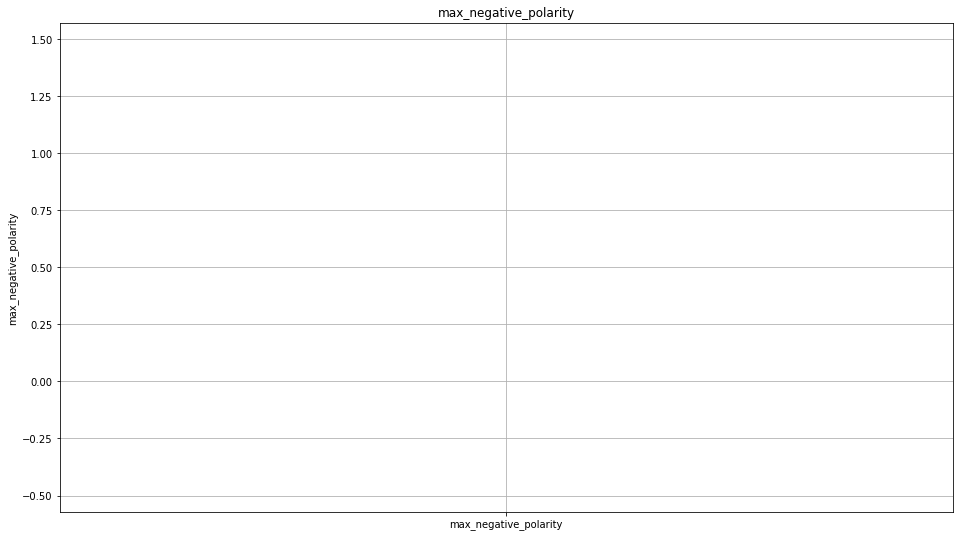

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


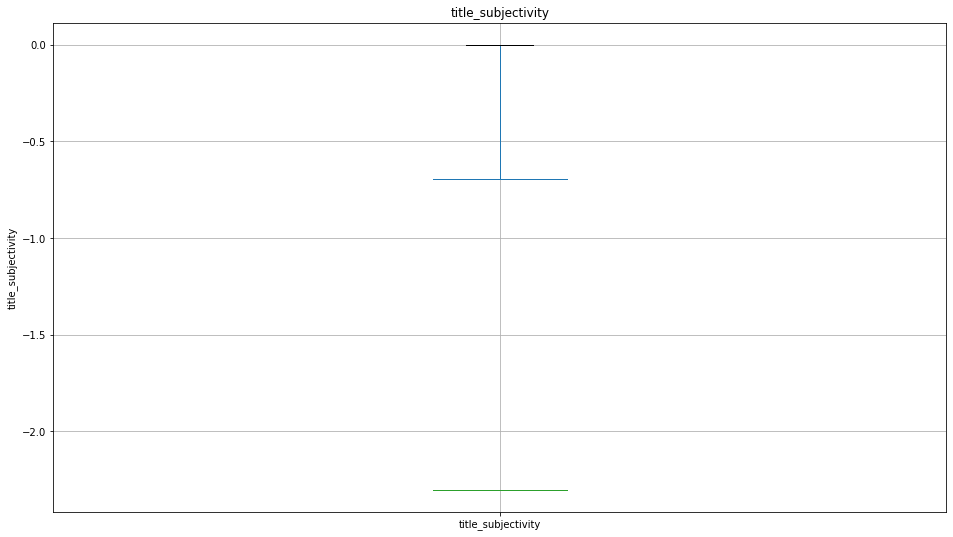

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dfgbe\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


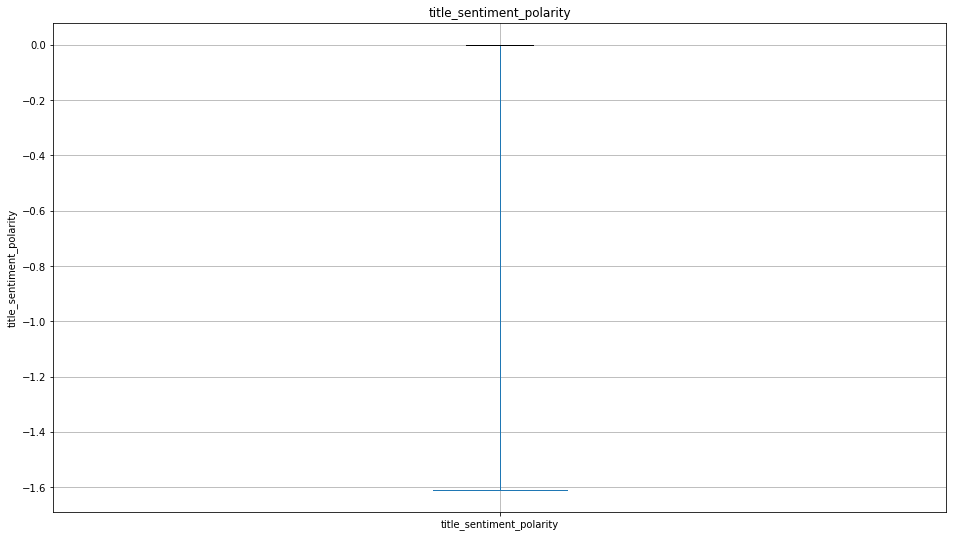

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


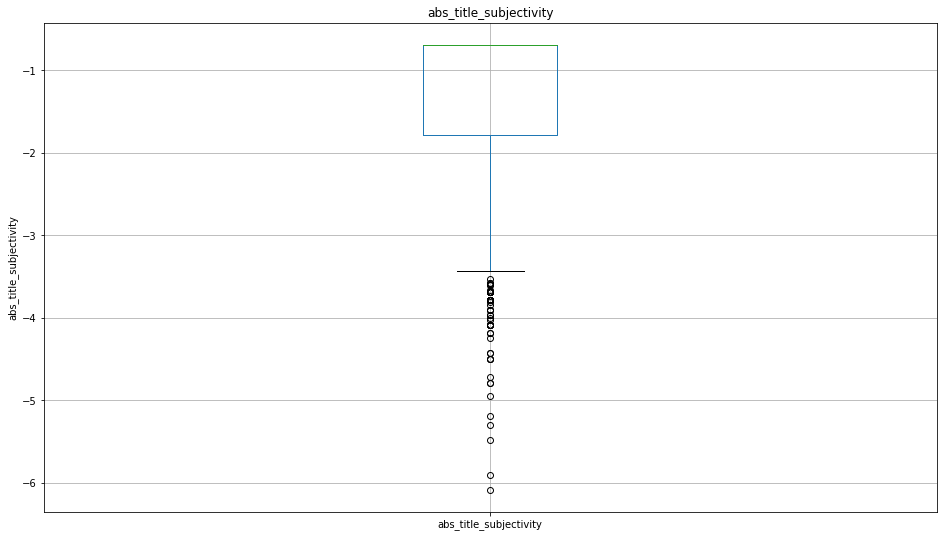

C:\Users\dfgbe\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dfgbe\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


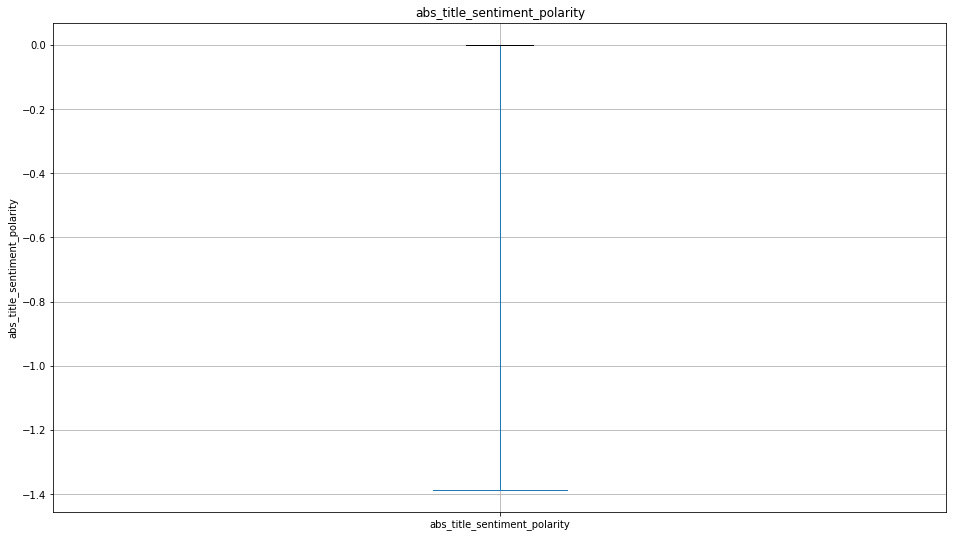

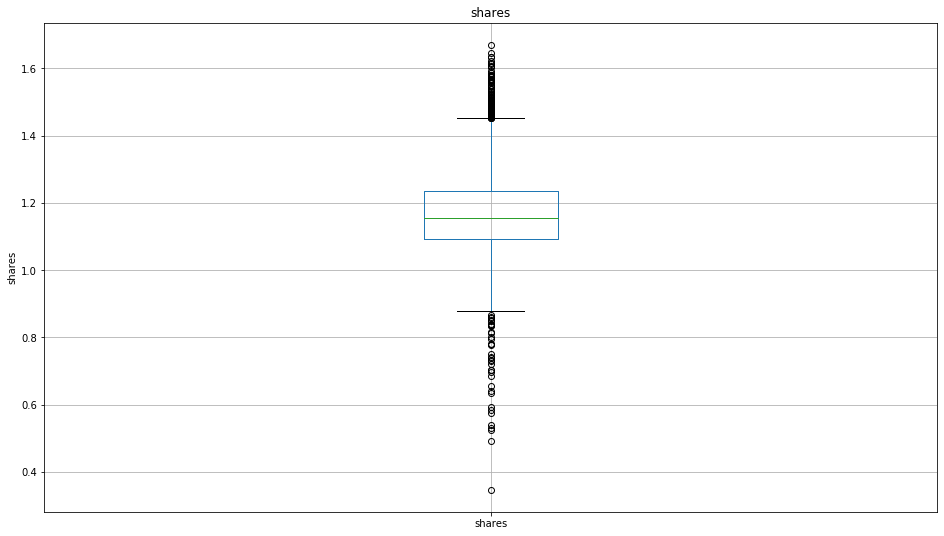

In [256]:
for feature in continuous_feature:
    data=dataset.copy()
    
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [257]:
dataset



,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,6,1.583550,0.650184,0.693647,0.964286,0.693647,1,0.001000,1.098946,4.744681,4,0,0,0,1,0,-1,5.774555,4.812184,11.515931,843300,415450.0000,2988.371336,8.409410,3714.512814,6.814544,6.814544,6.814544,1,0,0,0,0,0,0.462771,0.050069,0.050348,0.386811,0.050001,0.350000,0.075000,0.021277,0.021277,0.500000,0.500000,0.350000,0.350000,0.350,-0.200000,-0.200000,-0.200000,0.443939,-0.015152,0.056061,0.015152,3.068186
1,7,1.825357,0.418932,0.693647,0.644231,1.791926,2,0.693647,0.001000,4.613260,3,0,0,0,1,0,217,6.601231,6.164717,7.244942,617900,215533.3333,1044.500000,8.080931,2498.783924,0.001000,0.001000,0.001000,1,0,0,0,0,0,0.069391,0.066905,0.726183,0.066743,0.070778,0.578512,0.244008,0.044199,0.005525,0.888889,0.111111,0.385511,0.136364,1.000,-0.400000,-0.400000,-0.400000,0.000000,0.000000,0.500000,0.000000,3.796921
2,9,2.049165,0.382598,0.693647,0.635478,2.833272,0,0.693647,0.001000,4.725058,7,0,0,0,0,0,4,7.601403,5.938415,0.001000,843300,146642.8571,0.000000,8.766899,2543.161561,0.001000,0.001000,0.001000,0,0,0,1,0,0,0.028869,0.028572,0.742863,0.170934,0.028762,0.510478,0.195651,0.059165,0.023202,0.718310,0.281690,0.465324,0.050000,1.000,-0.264444,-0.750000,-0.100000,0.000000,0.000000,0.500000,0.000000,2.082785
3,10,2.069976,0.370530,0.693647,0.636986,2.565026,2,0.693647,0.001000,4.434483,10,1,0,0,0,0,4,6.375027,5.470402,0.001000,690400,102570.0000,0.000000,8.236944,2572.800545,7.003975,7.003975,7.003975,0,0,0,1,0,0,0.020216,0.020014,0.020007,0.020318,0.919446,0.518714,0.214039,0.066995,0.015764,0.809524,0.190476,0.390143,0.100000,1.000,-0.277083,-0.800000,-0.008333,0.000000,0.000000,0.500000,0.000000,2.924796
4,8,1.769606,0.511425,0.693647,0.790123,1.386544,0,0.693647,0.001000,4.674419,7,1,0,0,0,0,4,6.152735,5.566052,0.001000,690400,117200.0000,0.000000,8.112544,2029.340699,0.001000,0.001000,0.001000,0,0,0,1,0,0,0.028901,0.028580,0.029893,0.030580,0.882047,0.327778,-0.165741,0.015504,0.038760,0.285714,0.714286,0.237500,0.100000,0.375,-0.393333,-0.700000,-0.166667,0.000000,0.000000,0.500000,0.000000,2.575188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,1.833106,0.456249,0.693647,0.663717,1.386544,2,0.693647,0.001000,4.700000,4,0,0,1,0,0,4,6.432942,5.872118,6.432942,617900,231930.2500,621.000000,8.101926,2079.047387,7.244942,7.244942,7.244942,0,0,0,0,0,0,0.303812,0.054524,0.050000,0.050000,0.541664,0.632292,0.453125,0.042105,0.000000,1.000000,0.000000,0.453125,0.100000,0.700,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2.877371
4996,9,1.854746,0.432694,0.693647,0.508876,3.178095,1,3.044570,0.693647,5.541284,8,0,0,0,0,0,-1,6.722631,4.795306,0.001000,843300,543362.5000,0.000000,8.872375,4022.509730,0.001000,0.001000,0.001000,0,1,0,0,0,0,0.025020,0.025112,0.025005,0.899857,0.025006,0.643210,0.336420,0.027523,0.004587,0.857143,0.142857,0.530556,0.083333,0.9

In [258]:
test=dataset.copy()

In [259]:
feature_scale=[feature for feature in test.columns if feature not in ['id','shares']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [260]:
scaler.transform(test[feature_scale])

array([[0.17647059, 0.69010353, 0.09906776, ..., 0.49242424, 0.11212121,
        0.01515152],
       [0.23529412, 0.79561509, 0.06377791, ..., 0.5       , 1.        ,
        0.        ],
       [0.35294118, 0.89327246, 0.05823324, ..., 0.5       , 1.        ,
        0.        ],
       ...,
       [0.47058824, 0.8975755 , 0.05203395, ..., 0.5       , 1.        ,
        0.        ],
       [0.47058824, 0.76141221, 0.08675267, ..., 0.75      , 1.        ,
        0.5       ],
       [0.47058824, 0.86541532, 0.0596916 , ..., 0.725     , 0.3       ,
        0.45      ]])

In [262]:
test.head

<bound method NDFrame.head of       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                  6          1.583550         0.650184          0.693647   
1                  7          1.825357         0.418932          0.693647   
2                  9          2.049165         0.382598          0.693647   
3                 10          2.069976         0.370530          0.693647   
4                  8          1.769606         0.511425          0.693647   
...              ...               ...              ...               ...   
4995              11          1.833106         0.456249          0.693647   
4996               9          1.854746         0.432694          0.693647   
4997              11          2.059026         0.341975          0.693647   
4998              11          1.746973         0.569484          0.693647   
4999              11          1.985323         0.392155          0.693647   

      n_non_stop_unique_tokens  num_hrefs  nu

In [265]:
data = pd.concat([test[['shares']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test[feature_scale]), columns=feature_scale)],
                    axis=1)

In [266]:
data.head()

,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,3.068186,0.176471,0.690104,0.099068,0.099678,0.001484,0.134586,0.016129,0.000000,0.253582,0.590022,0.333333,0.0,0.0,0.0,1.0,0.0,0.000000,0.512708,0.498160,0.843951,1.000000,0.492648,0.832115,0.711795,0.135608,0.508305,0.499621,0.508305,1.0,0.0,0.0,0.0,0.0,0.0,0.503012,0.054454,0.054726,0.420455,0.053927,0.373333,0.395030,0.139265,0.206508,0.500000,0.500000,0.350000,0.350000,0.350,0.800000,0.80,0.800000,0.443939,0.492424,0.112121,0.015152
1,3.796921,0.235294,0.795615,0.063778,0.099678,0.000991,0.347989,0.032258,0.147675,0.000000,0.573679,0.222222,0.0,0.0,0.0,1.0,0.0,0.738983,0.586119,0.638174,0.530922,0.732717,0.255583,0.290842,0.683989,0.091224,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.075425,0.072763,0.789330,0.072548,0.076336,0.617080,0.551646,0.289302,0.053624,0.888889,0.111111,0.385511,0.136364,1.000,0.600000,0.60,0.600000,0.000000,0.500000,1.000000,0.000000
2,2.082785,0.352941,0.893272,0.058233,0.099678,0.000978,0.550330,0.000000,0.147675,0.000000,0.587582,0.666667,0.0,0.0,0.0,0.0,0.0,0.016949,0.674937,0.614748,0.000000,1.000000,0.173892,0.000000,0.742058,0.092845,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.031379,0.031074,0.807461,0.185801,0.031021,0.544509,0.506834,0.387260,0.225194,0.718310,0.281690,0.465324,0.050000,1.000,0.735556,0.25,0.900000,0.000000,0.500000,1.000000,0.000000
3,2.924796,0.411765,0.902353,0.056392,0.099678,0.000980,0.498208,0.032258,0.147675,0.000000,0.551447,1.000000,1.0,0.0,0.0,0.0,0.0,0.016949,0.566031,0.566299,0.000000,0.818688,0.121629,0.000000,0.697196,0.093927,0.522437,0.513512,0.522437,0.0,0.0,0.0,1.0,0.0,0.0,0.021974,0.021766,0.021747,0.022085,0.991646,0.553294,0.523874,0.438513,0.152999,0.809524,0.190476,0.390143,0.100000,1.000,0.722917,0.20,0.991667,0.000000,0.500000,1.000000,0.000000
4,2.575188,0.294118,0.771288,0.077893,0.099678,0.001216,0.269221,0.000000,0.147675,0.000000,0.581284,0.666667,1.0,0.0,0.0,0.0,0.0,0.016949,0.546291,0.576200,0.000000,0.818688,0.138978,0.000000,0.686665,0.074086,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.031414,0.031082,0.032492,0.033240,0.951311,0.349630,0.171942,0.101480,0.376197,0.285714,0.714286,0.237500,0.100000,0.375,0.606667,0.30,0.833333,0.000000,0.500000,1.000000,0.000000
